In [1]:
import numpy as np
import pandas as pd
import os
import sys
import re
import matplotlib.pyplot as plt
import pickle
sys.path.insert(0, '../../../')
import DataAnalysis as aj
plt.rcParams['text.latex.preamble'] = [r'\boldmath']
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
from matplotlib import cm

In [2]:
MSD = pickle.load(open('../MSD.pickle','rb'))
df = pd.DataFrame(index = MSD.keys(), columns = ['Temperature','MSD','Error'], dtype = object)

#colors = ['b','m','g','r']
colors = cm.plasma(np.linspace(0.1,0.8,4))

for sample in MSD.keys():
    df.loc[sample, 'Temperature'] = MSD[sample][0]
    df.loc[sample, 'MSD'] = MSD[sample][1]
    df.loc[sample, 'Error'] = MSD[sample][2]
    

In [3]:
df

Temperature  \
Sample_Bulk Perovskite/10Br  [299.993, 292.676, 281.801, 271.288, 261.653, ...   
Sample_BTA_LOW_D/n=2         [300.23, 294.935, 284.353, 271.889, 261.786, 2...   
Sample_BTA_LOW_D/n=3         [300.456, 295.545, 282.41, 271.677, 261.735, 2...   
Sample_BTA_LOW_D/n=1         [299.991, 293.088, 281.87, 271.881, 261.827, 2...   
Sample_Bulk Perovskite/20Br  [299.984, 292.839, 281.861, 271.82, 261.777, 2...   
Sample_Bulk Perovskite/0Br   [300.046, 293.051, 282.054, 271.918, 261.911, ...   
Sample_PEA_LOW_D/n=3         [300.06, 292.62, 281.694, 271.593, 261.651, 25...   
Sample_PEA_LOW_D/n=2         [300.0, 292.561, 281.787, 271.665, 261.652, 25...   
Sample_PEA_LOW_D/n=1         [299.661, 292.72, 281.832, 271.693, 261.677, 2...   
Sample_Bulk Perovskite/15Br  [299.983, 292.815, 281.851, 271.688, 261.612, ...   

                                                                           MSD  \
Sample_Bulk Perovskite/10Br  [0.59046, 0.584367, 0.546337, 0.502577, 0.4751...   
Sample_BTA_LOW_D/n=2         [0.40026, 0.496007, 0.415574, 0.31558, 0.28886...   
Sample_BTA_LOW_D/n=3         [0.453994, 0.45007, 0.400638, 0.359424, 0.3430...   
Sample_BTA_LOW_D/n=1         [0.376871, 0.365659, 0.338624, 0.320975, 0.227...   
Sample_Bulk Perovskite/20Br  [0.437414, 0.439545, 0.428634, 0.403666, 0.387...   
Sample_Bulk Perovskite/0Br   [0.608887, 0.602721, 0.550559, 0.511321, 0.477...   
Sample_PEA_LOW_D/n=3         [0.173816, 0.165791, 0.15974, 0.151683, 0.1441...   
Sample_PEA_LOW_D/n=2         [0.121939, 0.120962, 0.113185, 0.104671, 0.094...   
Sample_PEA_LOW_D/n=1         [0.103422, 0.0969307, 0.0885523, 0.0808274, 0....   
Sample_Bulk Perovskite/15Br  [0.53766, 0.528833, 0.500147, 0.45232, 0.42080...   

                                                                         Error  
Sample_Bulk Perovskite/10Br  [0.00337862, 0.0033413, 0.00321447, 0.00308336...  
Sample_BTA_LOW_D/n=2         [0.00172602, 0.00195884, 0.00176607, 0.0015149...  
Sample_BTA_LOW_D/n=3         [0.00215462, 0.00214857, 0.00194375, 0.0017886...  
Sample_BTA_LOW_D/n=1         [0.00167964, 0.00165633, 0.00161202, 0.0015681...  
Sample_Bulk Perovskite/20Br  [0.0034896, 0.00346724, 0.00340488, 0.00332285...  
Sample_Bulk Perovskite/0Br   [0.00339165, 0.00334882, 0.00322265, 0.0031075...  
Sample_PEA_LOW_D/n=3         [0.00204878, 0.00203123, 0.001997, 0.00196901,...  
Sample_PEA_LOW_D/n=2         [0.00122041, 0.00121372, 0.00119846, 0.0011862...  
Sample_PEA_LOW_D/n=1         [0.00145345, 0.00143987, 0.00142375, 0.0014080...  
Sample_Bulk Perovskite/15Br  [0.00323218, 0.00322469, 0.00312009, 0.0029665...

0% Br
Sample_Bulk Perovskite/10Br    [0.00337862, 0.0033413, 0.00321447, 0.00308336...
Sample_BTA_LOW_D/n=2           [0.00172602, 0.00195884, 0.00176607, 0.0015149...
Sample_BTA_LOW_D/n=3           [0.00215462, 0.00214857, 0.00194375, 0.0017886...
Sample_BTA_LOW_D/n=1           [0.00167964, 0.00165633, 0.00161202, 0.0015681...
Sample_Bulk Perovskite/20Br    [0.0034896, 0.00346724, 0.00340488, 0.00332285...
Sample_Bulk Perovskite/0Br     [0.00339165, 0.00334882, 0.00322265, 0.0031075...
Sample_PEA_LOW_D/n=3           [0.00204878, 0.00203123, 0.001997, 0.00196901,...
Sample_PEA_LOW_D/n=2           [0.00122041, 0.00121372, 0.00119846, 0.0011862...
Sample_PEA_LOW_D/n=1           [0.00145345, 0.00143987, 0.00142375, 0.0014080...
Sample_Bulk Perovskite/15Br    [0.00323218, 0.00322469, 0.00312009, 0.0029665...
Name: Error, dtype: object


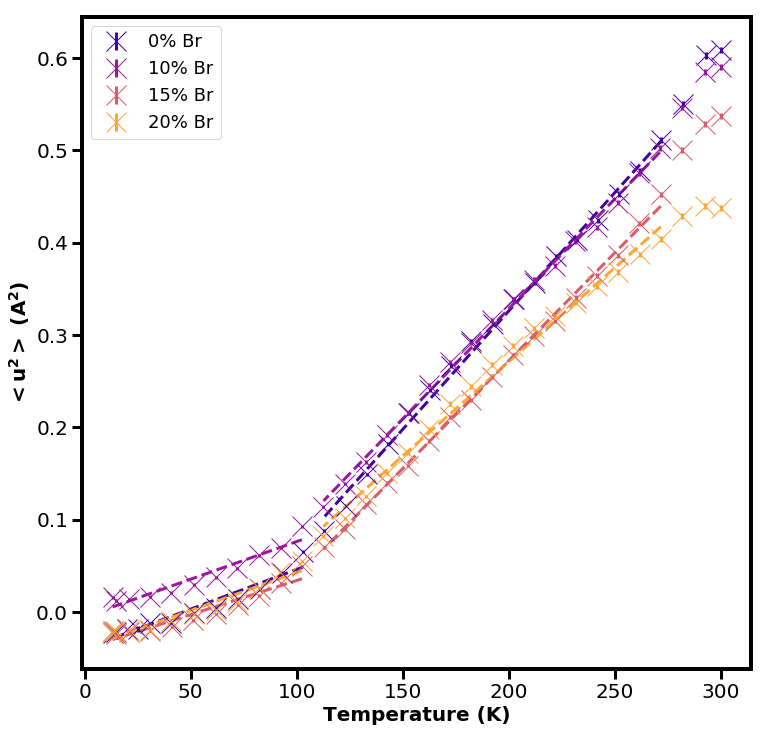

In [4]:
legend_list = ['0% Br','10% Br','15% Br','20% Br']
print legend_list[0]
f, ax = plt.subplots(nrows = 1, ncols = 1, figsize = [12,12])

p1 = 100
p2 = 270

for i,bulk in enumerate(sorted([key for key in MSD.keys() if re.findall('Bulk',key)],key = lambda x: int(re.findall(r'(\d+)Br',x)[0]))):
    x = df.loc[bulk,'Temperature']
    y = df.loc[bulk,'MSD']
    ax.errorbar(x,y,df.loc[bulk, 'Error'], label = legend_list[i], \
                fmt = 'x', linewidth = 3, markersize = 20, color = colors[i])
    
    s = aj.find_nearest(p1, x)
    e = aj.find_nearest(p2, x)

    
    popt, pvar = curve_fit(aj.linear_off, x[s:],y[s:], p0 = [0.1/50., 0])
    popt2, pvar2 = curve_fit(aj.linear_off, x[e:s],y[e:s], p0 = [0.1/50., 0])
    
    y_fit1 = aj.linear_off(x[s:], *popt)
    y_fit2 = aj.linear_off(x[e:s], *popt2)
    
    ax.plot(x[s:], y_fit1, color = colors[i], linewidth  = 3, linestyle = '--')
    ax.plot(x[e:s], y_fit2, color = colors[i], linewidth  = 3, linestyle = '--')
    
       
aj.figure_quality_axes(ax,'Temperature (K)', r'$\bf<u^{2}>$ ($\bfA^2$)','', legend = True)

h, l = ax.get_legend_handles_labels()

f.savefig('MSDs.svg',format='svg', dpi=1200)
print df.loc[:,'Error']

plt.show()

In [5]:
EISF = pickle.load(open('../EISF.pickle','rb'))
EISF

{'Sample_BTA_LOW_D/n=1/200 K/Broad_EISF.txt': array([[3.0000000e-01, 5.0000000e-01, 7.0000000e-01, 9.0000000e-01,
         1.1000000e+00, 1.3000000e+00, 1.5000000e+00, 1.7000000e+00,
         1.9000000e+00],
        [9.7353762e-01, 9.6434884e-01, 9.4705332e-01, 9.2652258e-01,
         9.0447291e-01, 8.8059192e-01, 8.5980068e-01, 8.4873624e-01,
         8.2318359e-01],
        [2.2843773e-03, 1.7036792e-03, 1.8735742e-03, 1.9407229e-03,
         2.0002687e-03, 2.0447899e-03, 2.1116332e-03, 1.9561457e-03,
         2.0615464e-03]]),
 'Sample_BTA_LOW_D/n=1/200 K/Narrow_EISF.txt': array([[3.0000000e-01, 5.0000000e-01, 7.0000000e-01, 9.0000000e-01,
         1.1000000e+00, 1.3000000e+00, 1.5000000e+00, 1.7000000e+00,
         1.9000000e+00],
        [9.7949032e-01, 9.7017616e-01, 9.5333360e-01, 9.3759611e-01,
         9.0483540e-01, 8.7354538e-01, 8.4645068e-01, 8.1644978e-01,
         7.8403254e-01],
        [2.4408585e-03, 1.8492048e-03, 2.0577341e-03, 2.1684459e-03,
         2.2152875e-03,

In [6]:
df_2 = pd.DataFrame(index = EISF.keys(), columns = ['q','EISF','Error'], dtype = object)

In [7]:
for sample in EISF.keys():
    df_2.loc[sample, 'q'] = EISF[sample][0]
    df_2.loc[sample, 'EISF'] = EISF[sample][1]
    df_2.loc[sample, 'Error'] = EISF[sample][2]

In [8]:
df_2

q  \
Sample_Bulk Perovskite/15Br/120 K/BroadLF_EISF.txt  [0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9]   
Sample_BTA_LOW_D/n=2/300 K/Broad_EISF.txt           [0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9]   
Sample_BTA_LOW_D/n=1/300 K/Narrow_EISF.txt          [0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9]   
Sample_BTA_LOW_D/n=2/225 K/Narrow_EISF.txt          [0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9]   
Sample_Bulk Perovskite/0Br/160K/NarrowLF_EISF.txt   [0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9]   
Sample_Bulk Perovskite/20Br/160K/BroadLF_EISF.txt   [0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9]   
Sample_PEA_LOW_D/n=1/250 K/EISF.txt                 [0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9]   
Sample_PEA_LOW_D/n=1/225 K/EISF.txt                 [0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9]   
Sample_PEA_LOW_D/n=2/250K/NarrowLF_EISF.txt         [0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9]   
Sample_Bulk Perovskite/15Br/160 K/BroadLF_EISF.txt  [0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9]   
Sample_Bulk Perovskite/15Br/120 K/NarrowLF_EISF...  [0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9]   
Sample_Bulk Perovskite/15Br/80 K/BroadLF_EISF.txt   [0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9]   
Sample_Bulk Perovskite/10Br/100 K/NarrowLF_EISF...  [0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9]   
Sample_PEA_LOW_D/n=3/225 K/EISF.txt                 [0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9]   
Sample_BTA_LOW_D/n=2/250 K/Narrow_EISF.txt          [0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9]   
Sample_Bulk Perovskite/0Br/120K/BroadLF_EISF.txt    [0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9]   
Sample_Bulk Perovskite/0Br/80K/BroadLF_EISF.txt     [0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9]   
Sample_Bulk Perovskite/10Br/120 K/NarrowLF_EISF...  [0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9]   
Sample_BTA_LOW_D/n=2/200 K/Narrow_EISF.txt          [0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9]   
Sample_Bulk Perovskite/10Br/100 K/BroadLF_EISF.txt  [0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9]   
Sample_Bulk Perovskite/15Br/100 K/BroadLF_EISF.txt  [0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9]   
Sample_BTA_LOW_D/n=1/300 K/Broad_EISF.txt           [0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9]   
Sample_PEA_LOW_D/n=1/200 K/EISF.txt                 [0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9]   
Sample_PEA_LOW_D/n=3/300 K/EISF.txt                 [0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9]   
Sample_Bulk Perovskite/10Br/120 K/BroadLF_EISF.txt  [0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9]   
Sample_BTA_LOW_D/n=1/225 K/Narrow_EISF.txt          [0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9]   
Sample_Bulk Perovskite/10Br/160 K/NarrowLF_EISF...  [0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9]   
Sample_Bulk Perovskite/15Br/80 K/NarrowLF_EISF.txt  [0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9]   
Sample_BTA_LOW_D/n=2/300 K/Narrow_EISF.txt          [0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9]   
Sample_BTA_LOW_D/n=2/200 K/Broad_EISF.txt           [0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9]   
...                                                                                           ...   
Sample_Bulk Perovskite/20Br/100K/BroadLF_EISF.txt   [0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9]   
Sample_Bulk Perovskite/0Br/160K/BroadLF_EISF.txt    [0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9]   
Sample_PEA_LOW_D/n=1/300 K/EISF.txt                 [0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9]   
Sample_Bulk Perovskite/20Br/120K/BroadLF_EISF.txt   [0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9]   
Sample_Bulk Perovskite/20Br/80K/BroadLF_EISF.txt    [0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9]   
Sample_Bulk Perovskite/0Br/120K/NarrowLF_EISF.txt   [0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9]   
Sample_BTA_LOW_D/n=1/225 K/Broad_EISF.txt           [0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9]   
Sample_PEA_LOW_D/n=2/225K/BroadLF_EISF.txt          [0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9]   
Sample_Bulk Perovskite/10Br/80 K/BroadLF_EISF.txt   [0.3

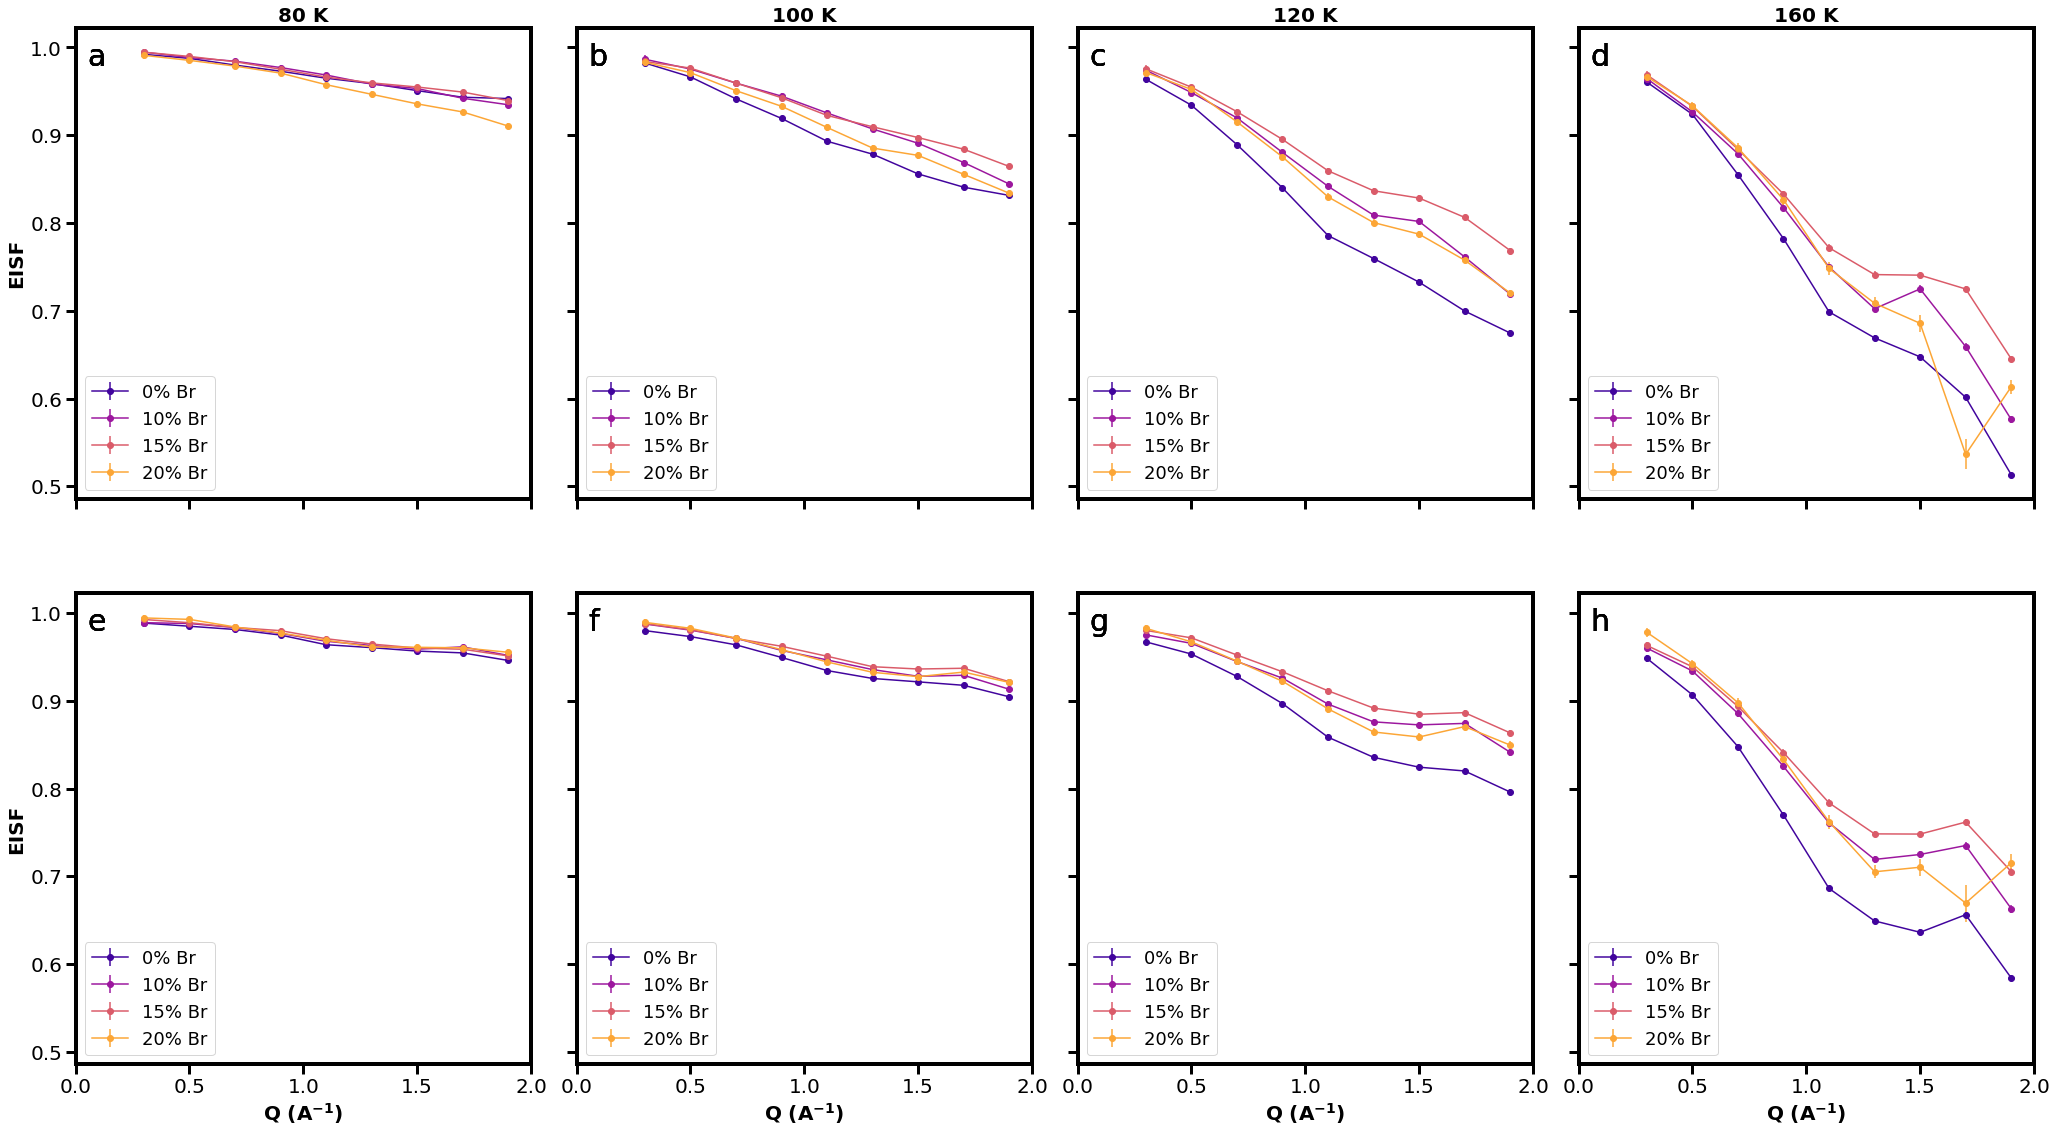

In [9]:
f2, ax2 = plt.subplots(nrows = 2, ncols = 4, figsize = [32, 16], sharey = True, sharex = True)
f2.tight_layout()
f2.subplots_adjust(wspace = 0.1 ,hspace = 0.2, top=0.95, bottom=0.05, left = 0.1, right = 0.95)
temp = sorted([key for key in EISF.keys() if re.findall('Bulk',key)], \
            key = lambda x: ( int(re.findall(r'(\d+)\s?K',x)[0]),int(re.findall(r'(\d+)Br',x)[0])) )

letter = ['a','b','c','d','e','f','g','h']

for i,bulk in enumerate([sample for sample in temp if re.findall(r'Narrow',sample)]):
    ax2[0,i/4].errorbar(df_2.loc[bulk,'q'], df_2.loc[bulk,'EISF'], df_2.loc[bulk, 'Error'], \
                               label = re.findall(r'(\d+)\s?Br',bulk)[0]+'% Br', fmt = 'o-', color = colors[i%4])
    ax2[0,i/4].annotate(s = letter[i/4], xy = (0.05,0.98), fontsize = 30)
    ax2[0,i/4].set_xlim([0, 2])
    aj.figure_quality_axes(ax2[0,i/4], r'', 'EISF', '', legend = True, loc = 3)
    
for i,bulk in enumerate([sample for sample in temp if re.findall(r'Broad',sample)]):
    ax2[1,i/4].errorbar(df_2.loc[bulk,'q'], df_2.loc[bulk,'EISF'], df_2.loc[bulk, 'Error'], \
                               label = re.findall(r'(\d+)\s?Br',bulk)[0] + '% Br', fmt = 'o-', color = colors[i%4])
    
    ax2[1,i/4].set_xlim([0, 2])
    ax2[1,i/4].annotate(s = letter[i/4+4], xy = (0.05,0.98), fontsize = 30)
    aj.figure_quality_axes(ax2[1,i/4], r'Q ($\bfA^{-1}$)', 'EISF', '', legend = True, loc = 3)

    
ax2[0,0].set_title('80 K', fontsize = 20,weight = 'bold')
ax2[0,1].set_title('100 K', fontsize = 20,weight = 'bold')
ax2[0,2].set_title('120 K', fontsize = 20,weight = 'bold')
ax2[0,3].set_title('160 K', fontsize = 20,weight = 'bold')
ax2[0,1].set_ylabel('')
ax2[0,2].set_ylabel('')
ax2[0,3].set_ylabel('')
ax2[1,1].set_ylabel('')
ax2[1,2].set_ylabel('')
ax2[1,3].set_ylabel('')

f2.savefig('All_EISF.svg',format='svg', dpi=1200)

plt.show()

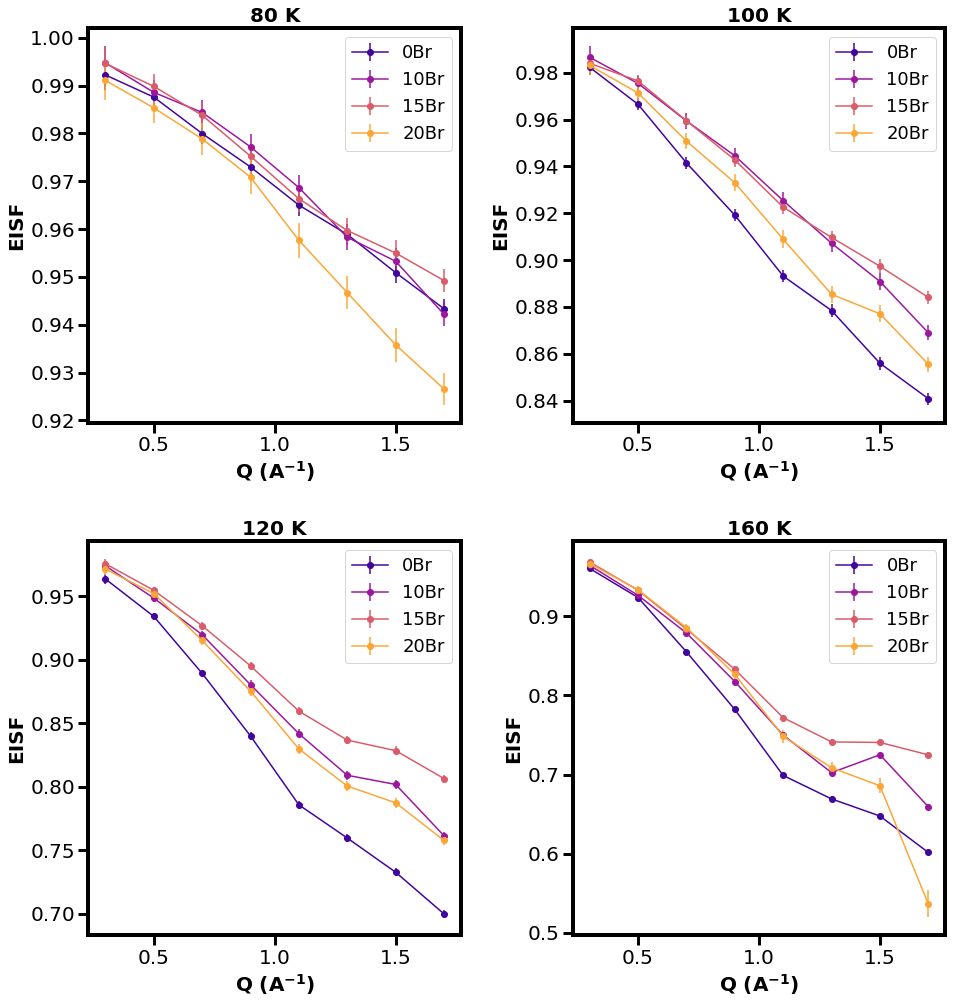

In [10]:
f3, ax3 = plt.subplots(nrows = 2, ncols = 2, figsize = [14,14])
f3.tight_layout()
f3.subplots_adjust(wspace = 0.3, hspace = 0.3, top=0.95, bottom=0.05, left = 0.1, right = 0.95)
temp = sorted([key for key in EISF.keys() if re.findall('Bulk',key)], \
              key = lambda x: ( int(re.findall(r'(\d+)\s?K',x)[0]),int(re.findall(r'(\d+)Br',x)[0])) )

for i,bulk in enumerate([sample for sample in temp if re.findall(r'Narrow',sample)]):
    ax3[i/4/2, i/4%2].errorbar(df_2.loc[bulk,'q'][0:-1], df_2.loc[bulk,'EISF'][0:-1], df_2.loc[bulk, 'Error'][0:-1], \
                               label = re.findall(r'\d+\s?Br',bulk)[0], fmt = 'o-', color = colors[i%4])
    aj.figure_quality_axes(ax3[i/4/2, i/4%2], r'Q ($\bfA^{-1}$)', 'EISF', '', legend = True)

ax3[0,0].set_title('80 K', fontsize = 20, weight = 'bold')
ax3[0,1].set_title('100 K', fontsize = 20,weight = 'bold')
ax3[1,0].set_title('120 K', fontsize = 20,weight = 'bold')
ax3[1,1].set_title('160 K', fontsize = 20,weight = 'bold')
f3.savefig("Narrow_EISF.svg",format='svg', dpi=1200)

plt.show()

[[ 0.61802016  3.82177984  3.60868228]
 [ 1.46424604  4.38030668  3.78798   ]
 [ 0.84533792  3.05369444  2.9609377 ]
 [ 0.26993984  3.43107744  4.4950696 ]
 [-0.41378936  4.6795492   3.0114441 ]
 [-0.67218572  5.44585868  3.6932805 ]
 [-1.27244668  4.0934956   2.79426658]
 [-0.04351004  5.10577     2.11621816]]


After Rotation

[[-6.13181475e-01  7.52506402e-01 -3.44882849e-01]
 [-2.66632229e-01  1.66007230e+00 -3.67044848e-03]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.57106226e+00  5.99019445e-01 -7.94337707e-04]
 [-6.13181475e-01  7.52506402e-01 -1.81358725e+00]
 [-1.27188225e+00  1.50166491e+00 -2.16540337e+00]
 [-9.36619346e-01 -1.96869002e-01 -2.16286017e+00]
 [ 3.66563597e-01  9.41742408e-01 -2.16641830e+00]]


[[ 1.69888196e-05  2.94010789e-04  6.89196947e-01]
 [ 3.46566235e-01  9.07859910e-01  1.03040935e+00]
 [ 6.13198464e-01 -7.52212391e-01  1.03407980e+00]
 [-9.57863800e-01 -1.53192946e-01  1.03328546e+00]
 [ 1.69888196e-05  2.94010789e-04 -7.79507450e-01]
 [-

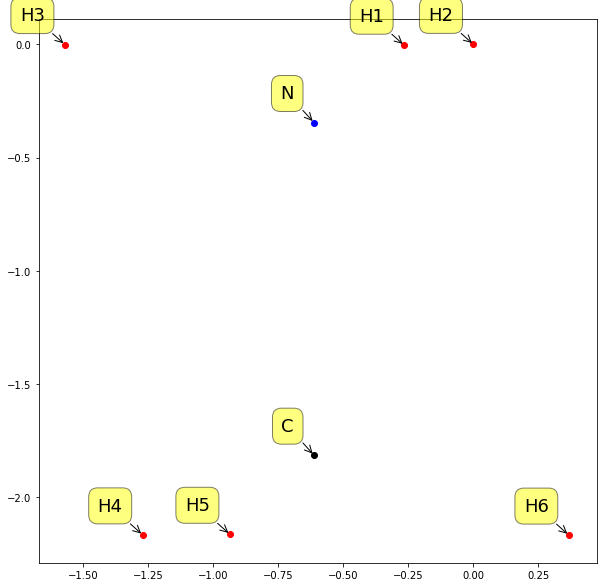

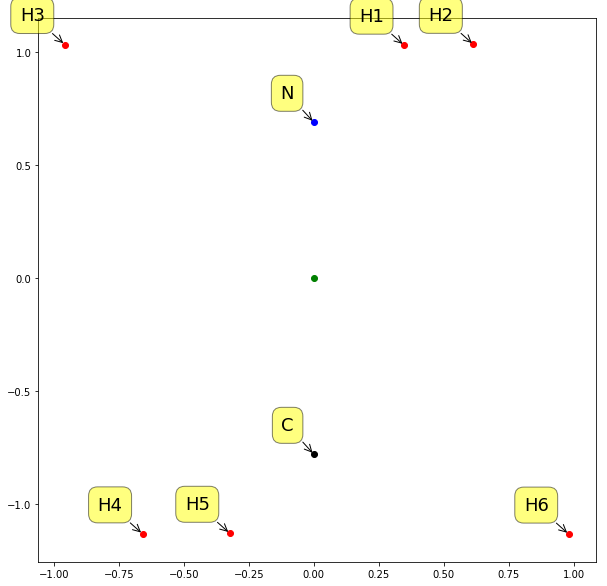

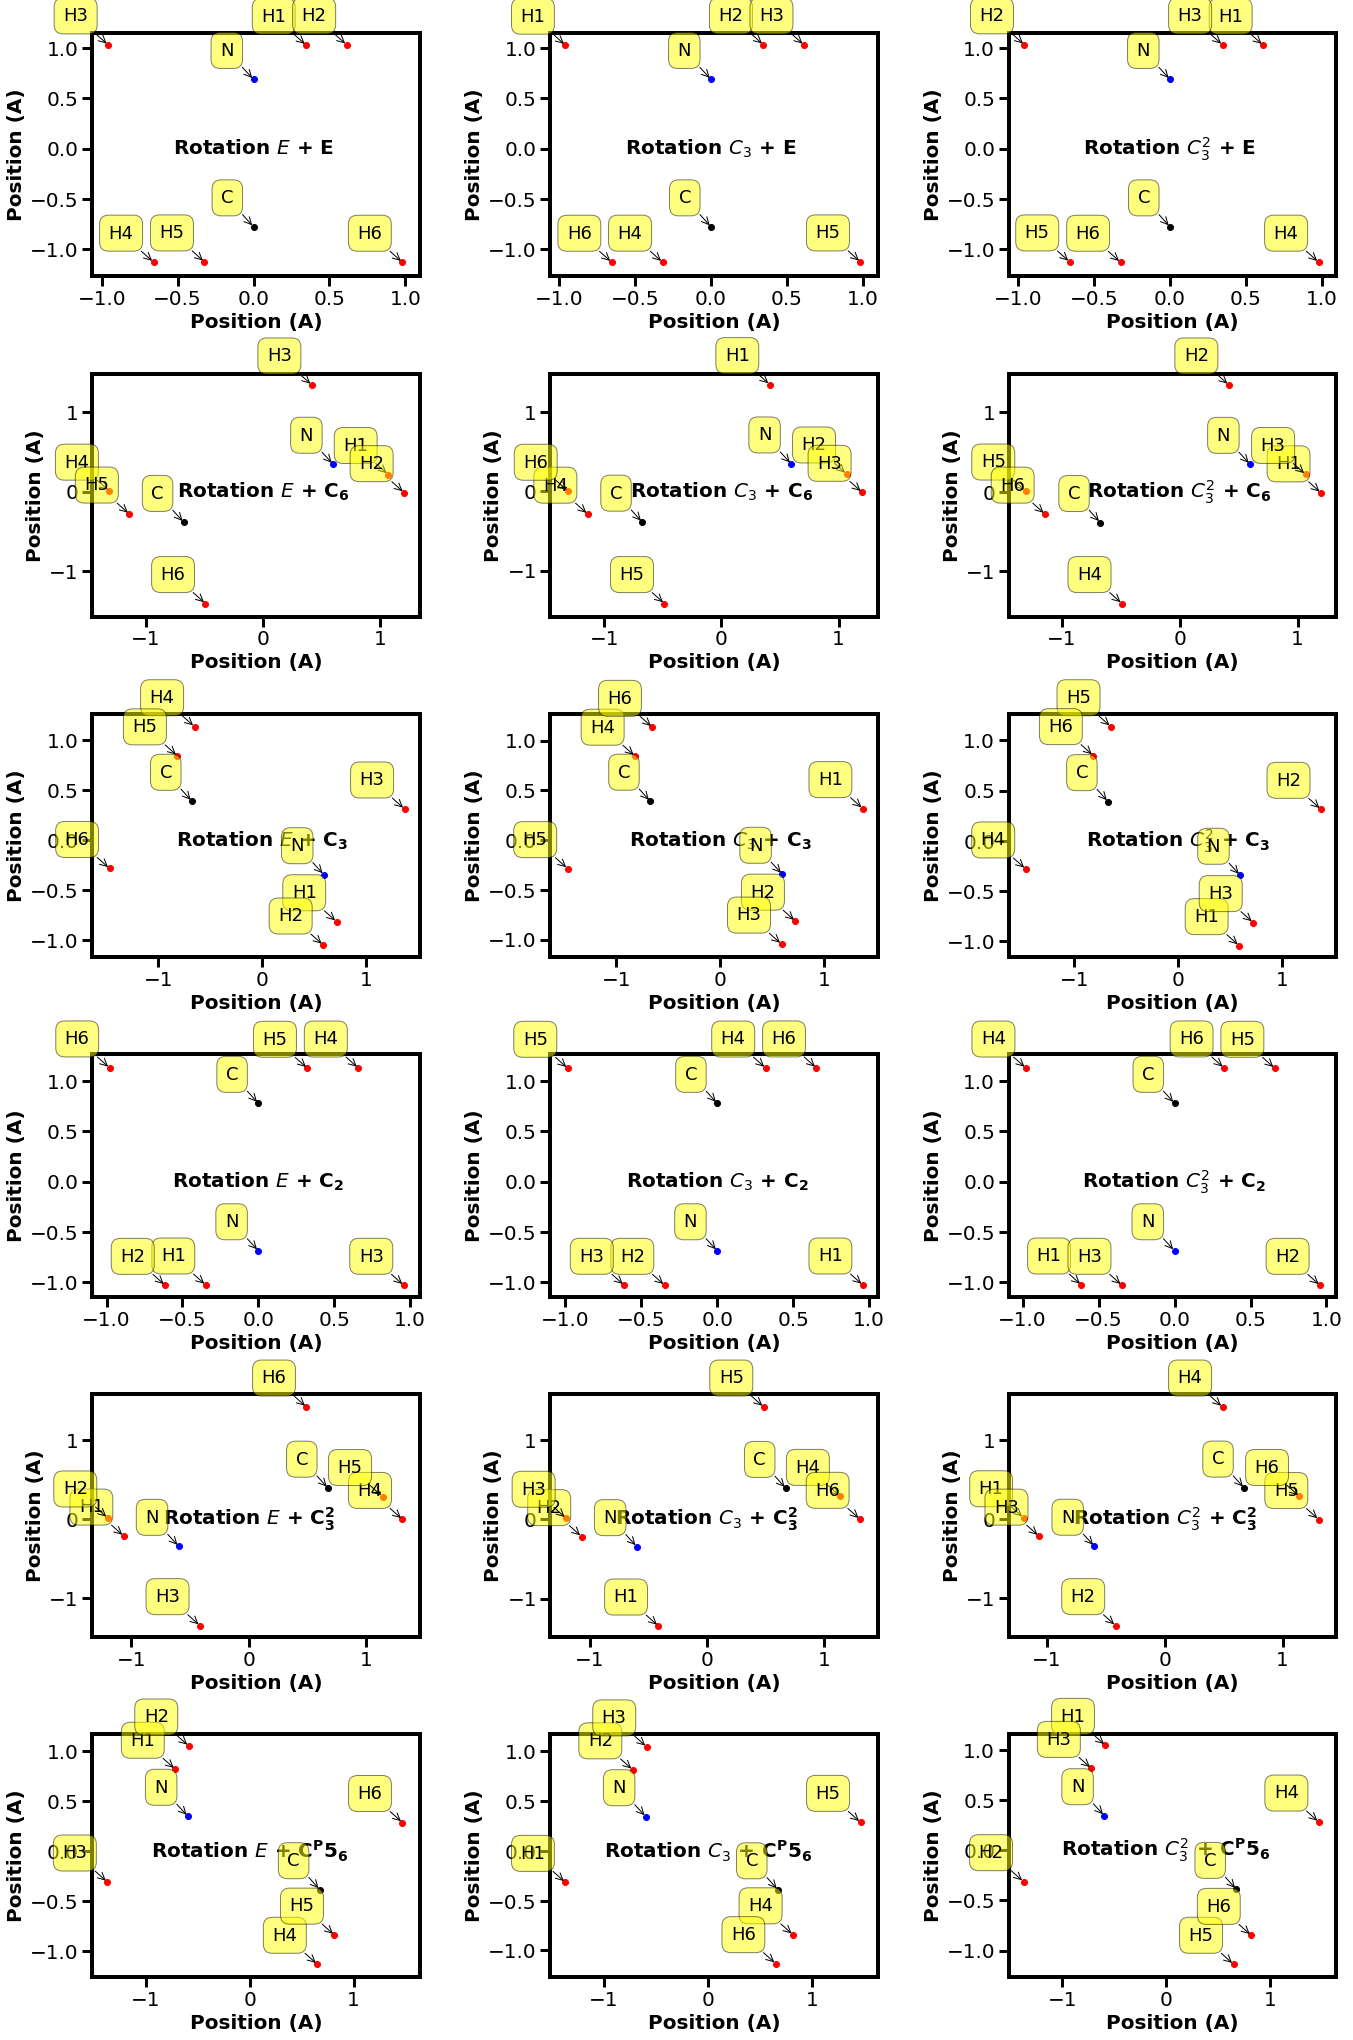



The distance between C and N1 is 1.30 A
The distance between C and N2 is 1.23 A
The distance between N1 and N2 is 2.23 A
The distance between C and H1 is 0.95 A
The distance between N1 and H2 is 0.84 A
The distance between N1 and H3 is 0.91 A
The distance between N2 and H4 is 0.91 A
The distance between N2 and H5 is 0.90 A
[[-2.29152584e-01 -5.48833472e-01  1.15396746e+00]
 [-5.95378386e-01 -1.42522011e+00  1.22390975e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.88415481e-01 -4.53506221e-01 -6.86156536e-01]
 [ 3.41929758e-01  8.31116291e-01 -1.14626266e-01]
 [ 2.74533216e-16 -9.18122689e-17  2.22682916e+00]
 [-1.87560643e-01 -4.58022832e-01  2.98469879e+00]
 [ 3.41762810e-01  8.31116755e-01  2.20911436e+00]]


After Rotation 2

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-9.52400548e-01 -5.16569636e-18 -1.00941299e-18]
 [ 6.77890247e-01 -5.40061556e-02 -1.10585629e+00]
 [ 2.38518344e-01 -9.02717563e-02 -1.82531178e+00]
 [ 1.58257257e+00 -5.14143133e-02 -1.154

[[ 1.         0.         0.       ]
 [ 0.        -0.5        0.8660254]
 [ 0.        -0.8660254 -0.5      ]]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-9.52400548e-01 -5.16569636e-18 -1.00941299e-18]
 [ 6.77890247e-01 -5.40061556e-02 -1.10585629e+00]
 [ 2.38518344e-01 -9.02717563e-02 -1.82531178e+00]
 [ 1.58257257e+00 -5.14143133e-02 -1.15436002e+00]
 [ 5.14356594e-01  5.46817289e-02  1.11229876e+00]
 [-3.48889716e-02  8.63557061e-02  1.83108687e+00]
 [ 1.41185817e+00  6.21574641e-02  1.16031675e+00]]
[[ 1.         0.         0.       ]
 [ 0.         0.5        0.8660254]
 [ 0.        -0.8660254  0.5      ]]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-9.52400548e-01 -5.16569636e-18 -1.00941299e-18]
 [ 6.77890247e-01 -5.40061556e-02 -1.10585629e+00]
 [ 2.38518344e-01 -9.02717563e-02 -1.82531178e+00]
 [ 1.58257257e+00 -5.14143133e-02 -1.15436002e+00]
 [ 5.14356594e-01  5.46817289e-02  1.11229876e+00]
 [-3.48889716e-02  8.63557061e-02  1.83108687e+00]
 [ 1.41185817e+0

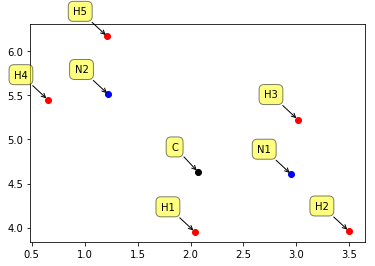

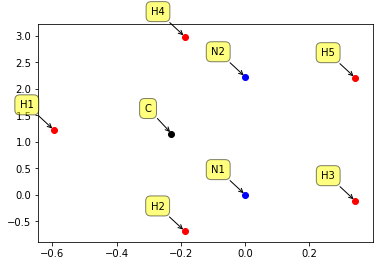

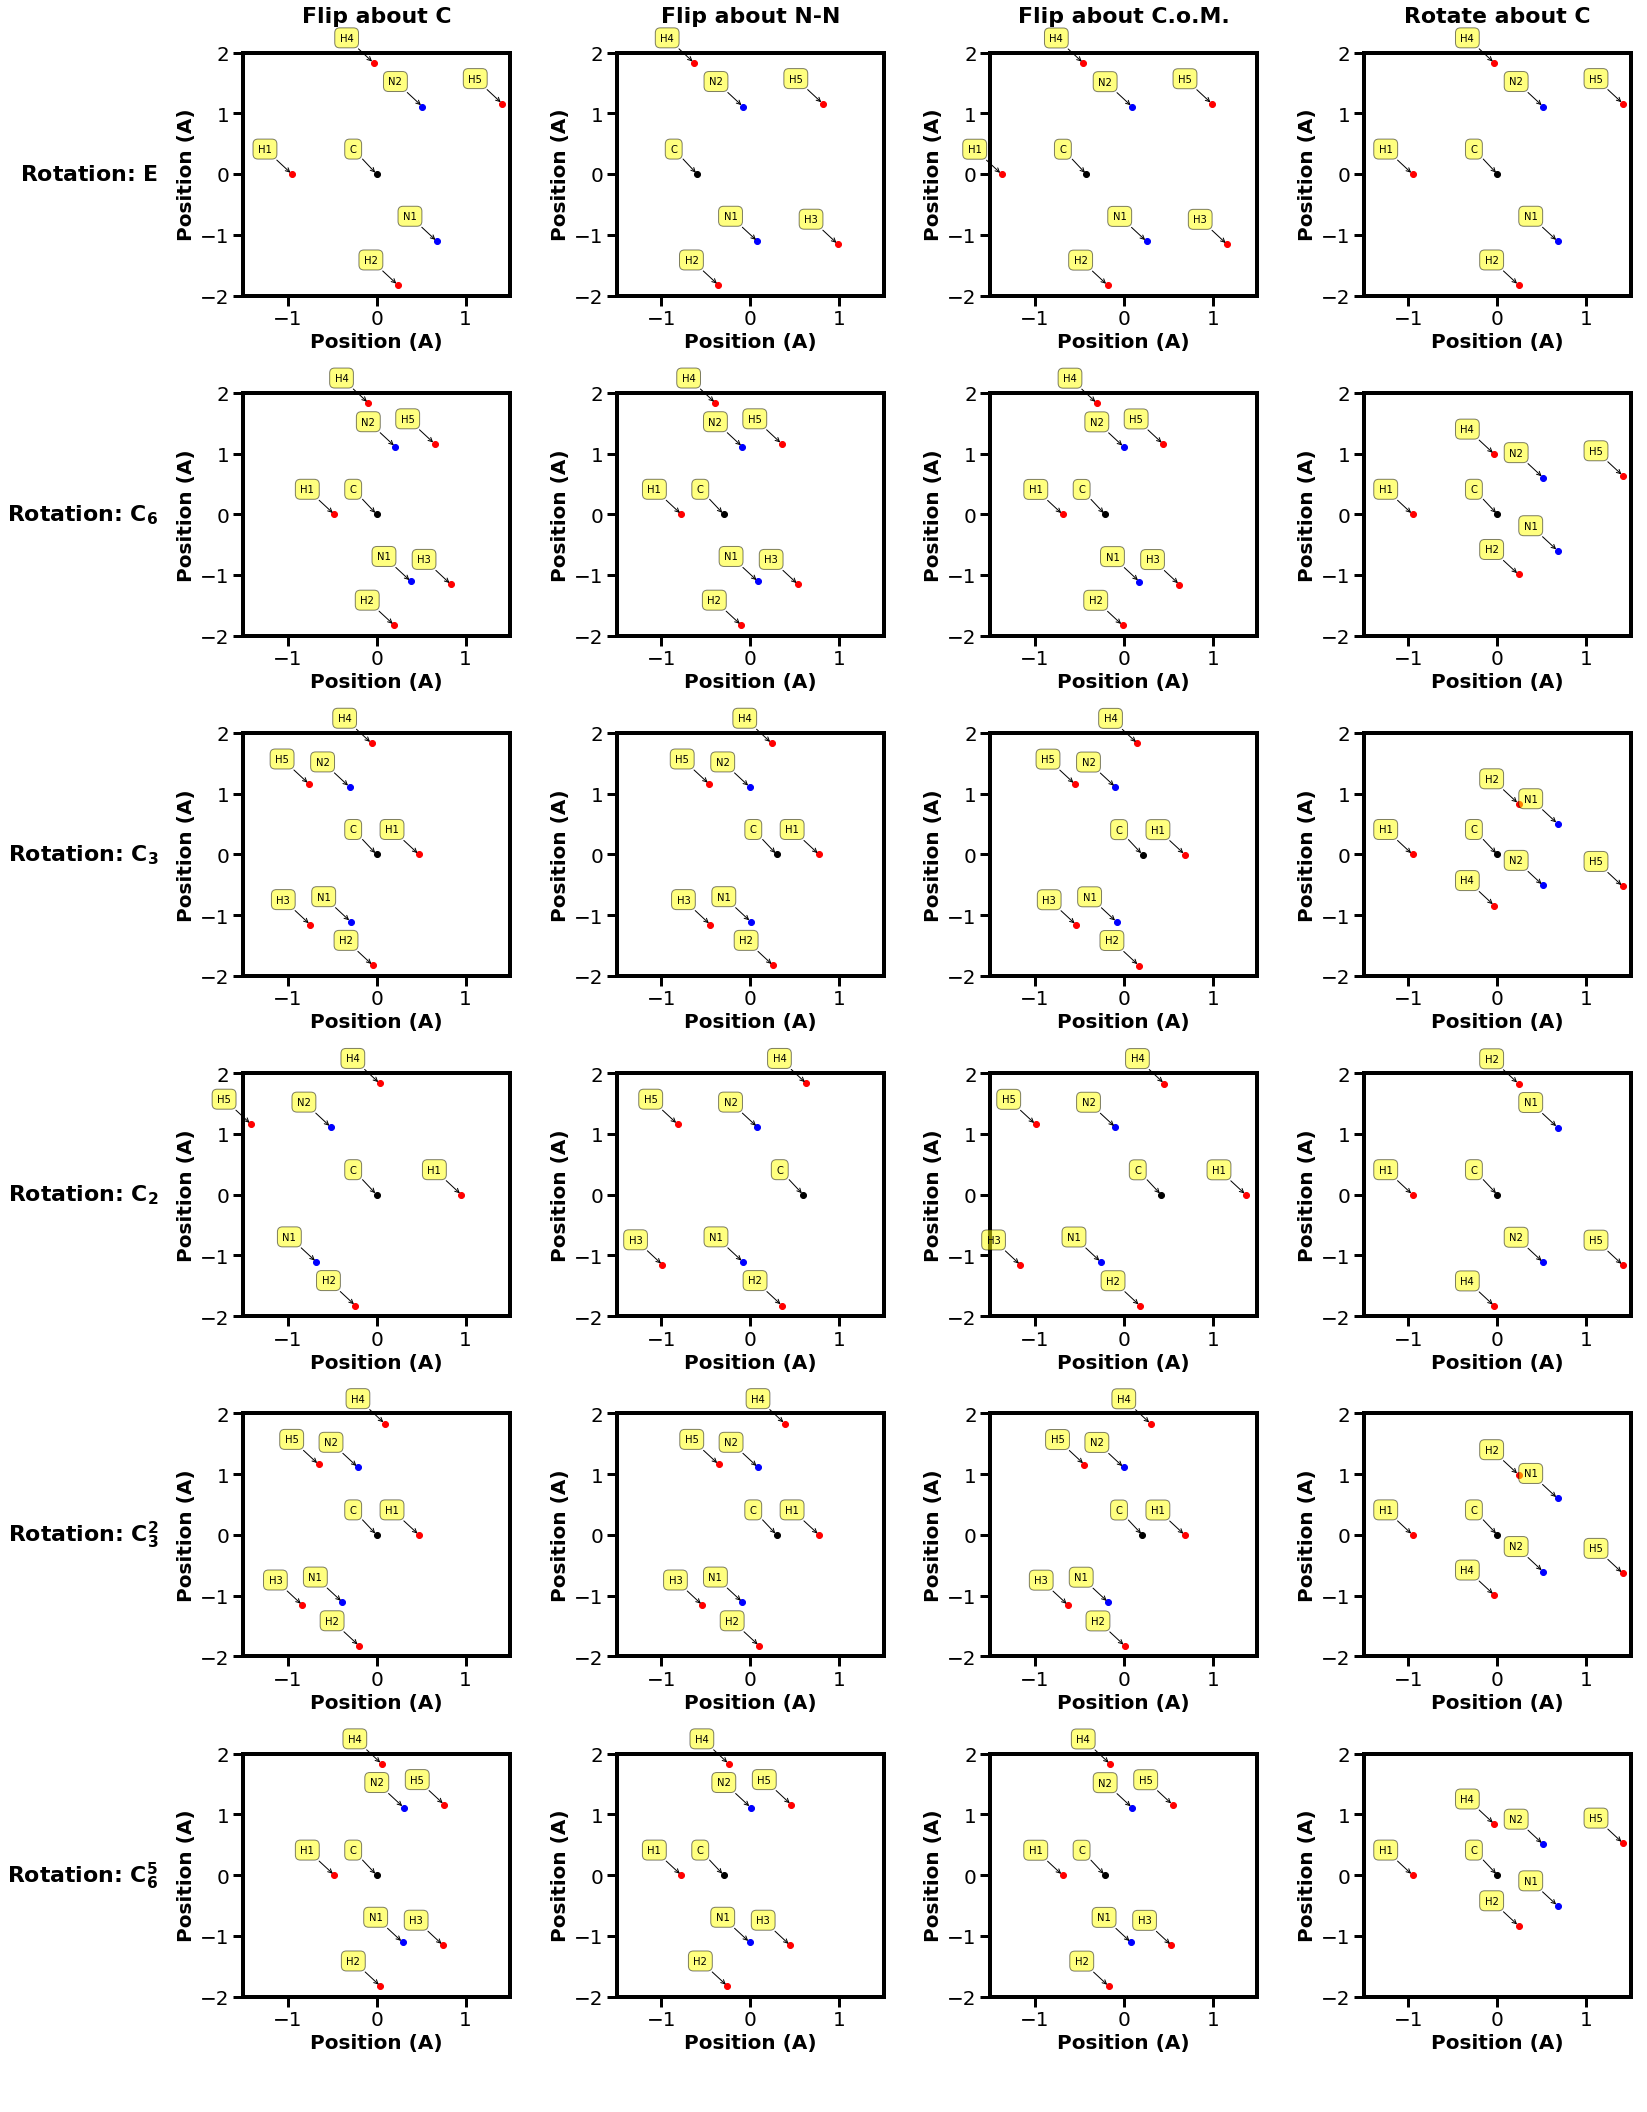

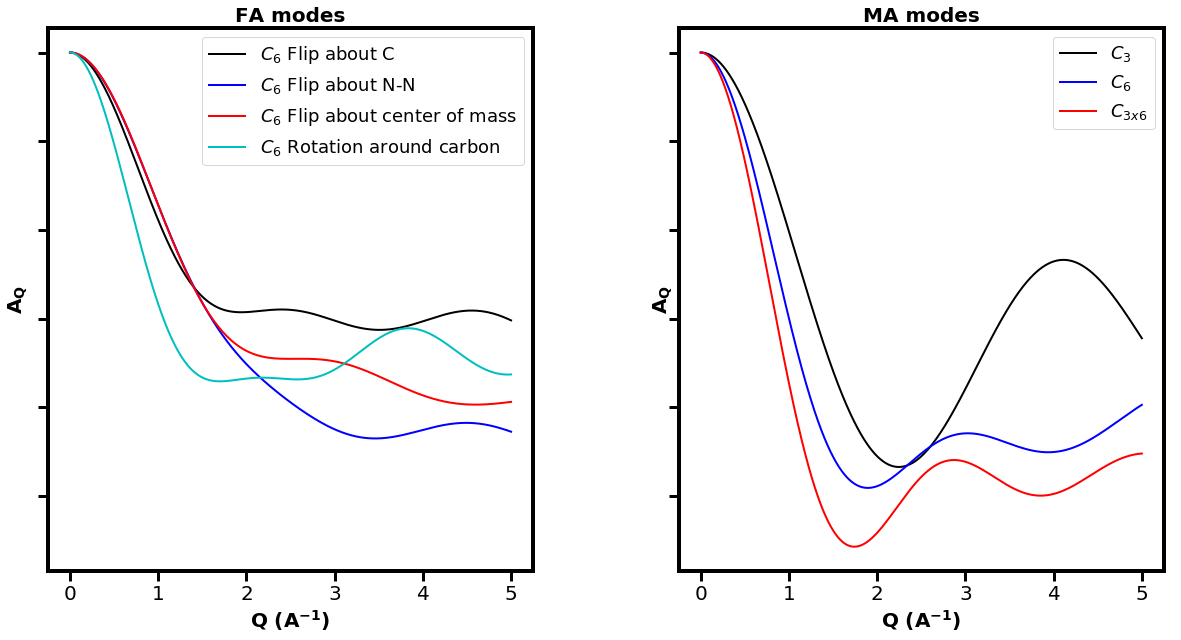

using MA_C3!
using MA_C3!
using MA_C3!
using MA_C3!
using MA_C3!
using MA_C3!
using MA_C3!
using MA_C3!


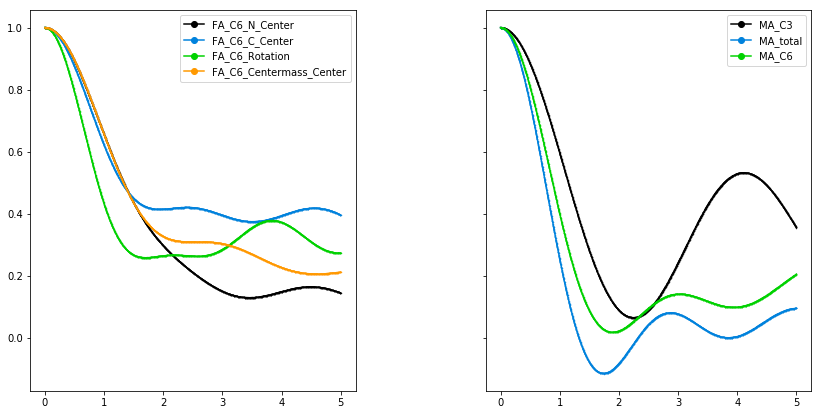

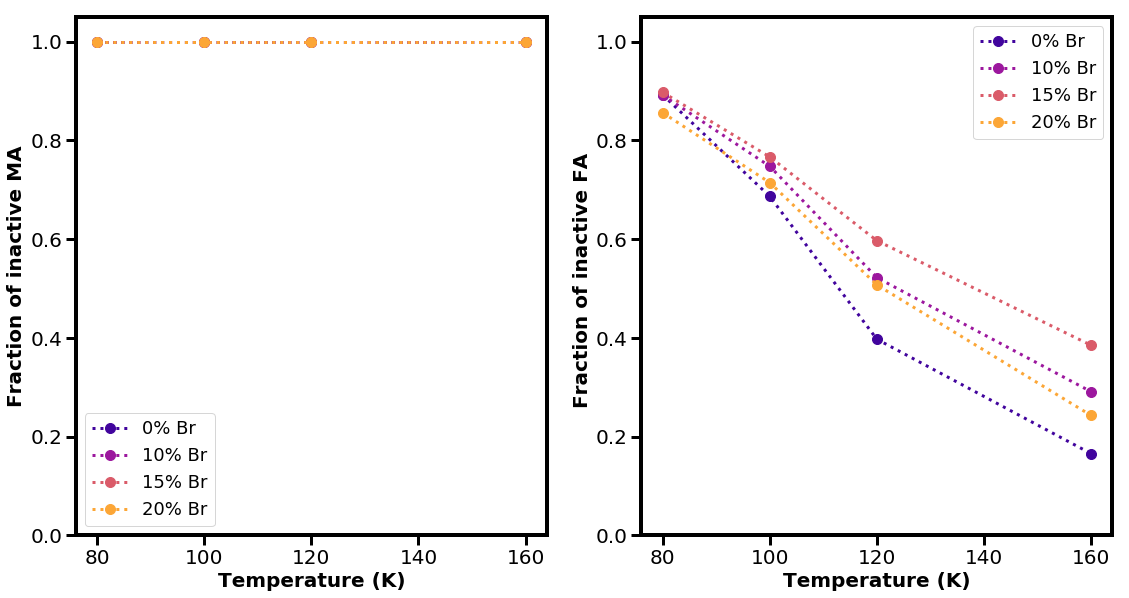

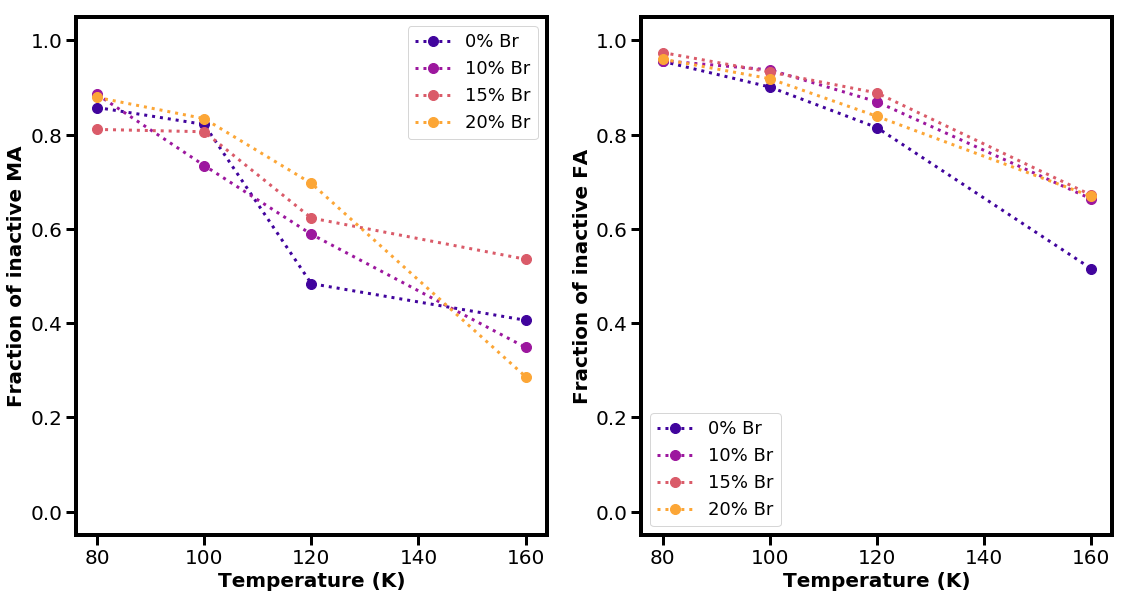

In [12]:
##Run all of the scripts to calculate theoretical EISFs and to calculate fits
os.chdir('../MA Rotations/')
%run get_distances_MA.py
os.chdir('../FA Rotations/')
%run get_distances_C4rotation.py
os.chdir('../')
%run -i fit_eisf.py
%run -i fit_h_fraction.py
%run -i fit_h_reduced.py

os.chdir('Figures/')





['0%-16ns-15nmBw-504nmExc-822nm.txt', '10%-16ns-15nmBw-504nmExc-800nm.txt', '15%-1600ns-15nmBw-504nmExc-793nm.txt', '20%-16ns-15nmBw-504nmExc-787nm.txt']


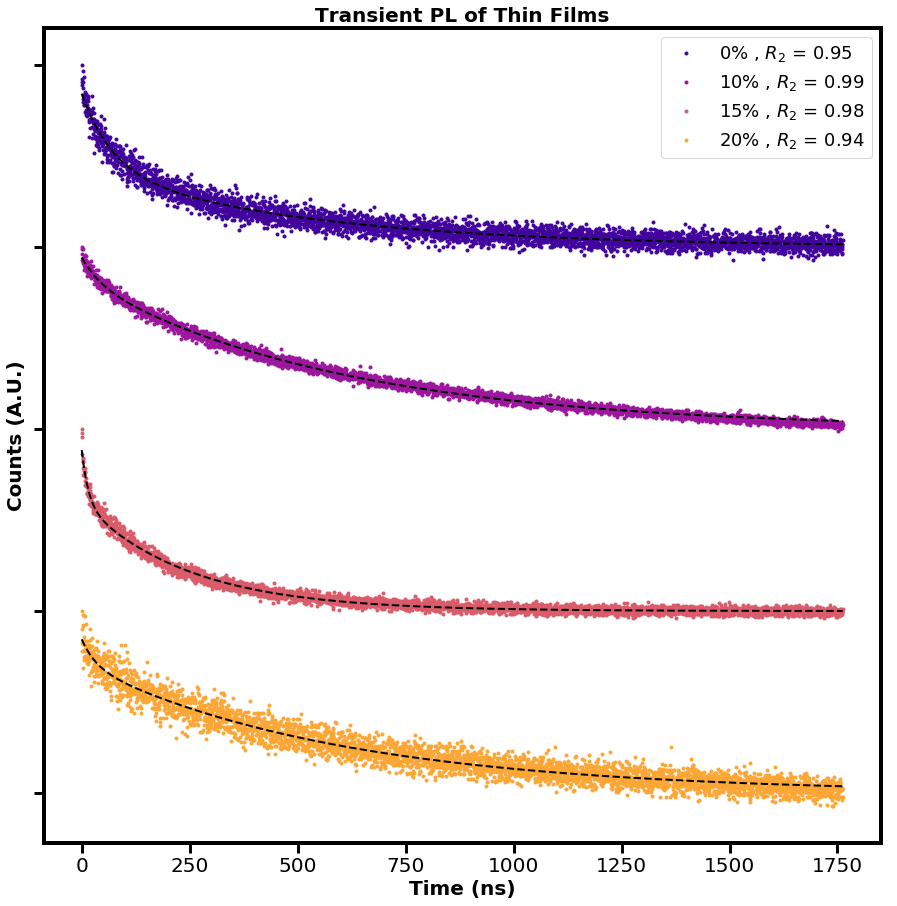

array([[4.10993359e-01, 1.26725941e-01, 2.89459166e-01, 1.36747583e-01],
       [7.04172740e+01, 4.38932996e+01, 1.51368582e+01, 3.22478043e+01],
       [4.31187865e-01, 8.15971829e-01, 5.94976948e-01, 7.07696418e-01],
       [5.18694873e+02, 6.03193718e+02, 2.47362109e+02, 5.98535191e+02]])

In [13]:
TF_PL = '../Br-study/Thin-Film PL/'
files  = [f for f in os.listdir(TF_PL) if re.findall(r'nm.txt',f)]
print files

TF_PL_df = pd.DataFrame(index = files, columns = ['Time','Counts'])

fits = np.zeros([4,4])
var = np.zeros([4,4])
r2 = np.zeros([4,1])

f4, ax4 = plt.subplots(nrows = 1, ncols = 1, figsize = [15,15])


for to_add, Filename in enumerate(files):
    TF_PL_df.loc[to_add] = aj.get_lifetime(TF_PL+Filename)
    x = TF_PL_df.loc[to_add, 'Time']
    y = TF_PL_df.loc[to_add, 'Counts']
    
    popt, pvar = curve_fit(aj.fit_multi_exp(2),x, y, p0 = [1,10,1,1000])
    fits
    
    y_pred = aj.fit_multi_exp(2)(x, *popt)
    r2[to_add] = r2_score(y,y_pred)
    ax4.plot(x,y+3 - to_add, '.', label = re.findall(r'\d+\s?%',Filename)[0] + ' , $R_2$ = {0:.2f}'.format(r2[to_add,0]),color = colors[to_add])
    ax4.plot(x, y_pred+3 - to_add,'--', linewidth  = 2, color = 'k')
    fits[:,to_add] = popt
    var[:,to_add] = np.sqrt(np.diag(pvar))

#ax4.set_yscale('log')

aj.figure_quality_axes(ax4, 'Time (ns)', 'Counts (A.U.)', 'Transient PL of Thin Films',legend = True)
ax4.set_yticks([0,1,2,3,4])
ax4.set_yticklabels({})
f4.savefig('Transient PL of TF.svg', format = 'svg', dpi = 1200)

np.savetxt('TF Fits.csv', np.concatenate((fits.T, var.T, r2), axis  = 1), delimiter  = ',')
plt.show()

fits

196 2448
196 2448
196 2448
196 2448


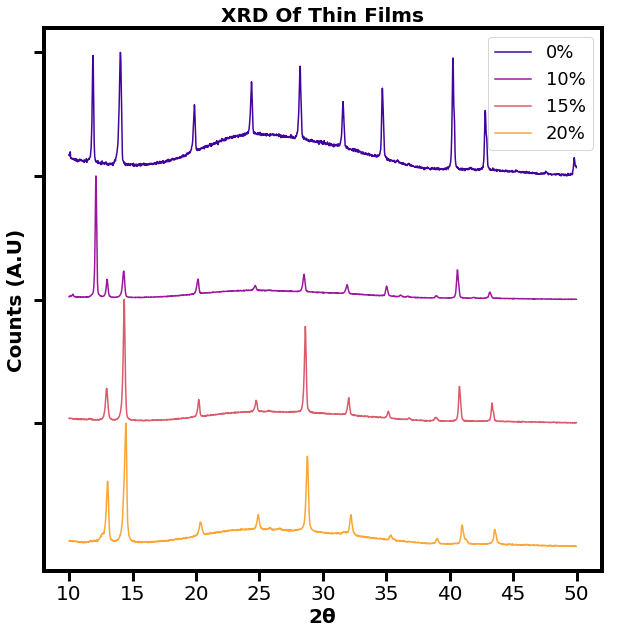

In [14]:
XRD_dir = '../Br-Study/Thin-film XRD/'

SCXRD = pd.DataFrame(index = ['0%', '10%', '15%', '20%'], columns = ['theta','counts'])

SCXRD.loc['0%'] = aj.get_XRD(XRD_dir+ 'br0.ras')
SCXRD.loc['10%'] = aj.get_XRD(XRD_dir+ 'br10.ras')
SCXRD.loc['15%'] = aj.get_XRD(XRD_dir+ 'br15.ras')
SCXRD.loc['20%'] = aj.get_XRD(XRD_dir+ 'br20.ras')

f5,ax5 = plt.subplots(nrows = 1, ncols = 1, figsize = [10,10])
i=0
for index, row in SCXRD.iterrows():
    ax5.plot(row['theta'][aj.find_nearest(10, row['theta']):], 3 - i+aj.min_max(\
        row['counts'][aj.find_nearest(10, row['theta']):]), label = index, color = colors[i])
    i+=1

aj.figure_quality_axes(ax5, r'2$\bf{\theta}$','Counts (A.U)', 'XRD Of Thin Films',legend = True)
ax5.set_yticks([1,2,3,4])
ax5.set_yticklabels({})
    
plt.show()

196 5698
196 5698
196 5698
196 5698


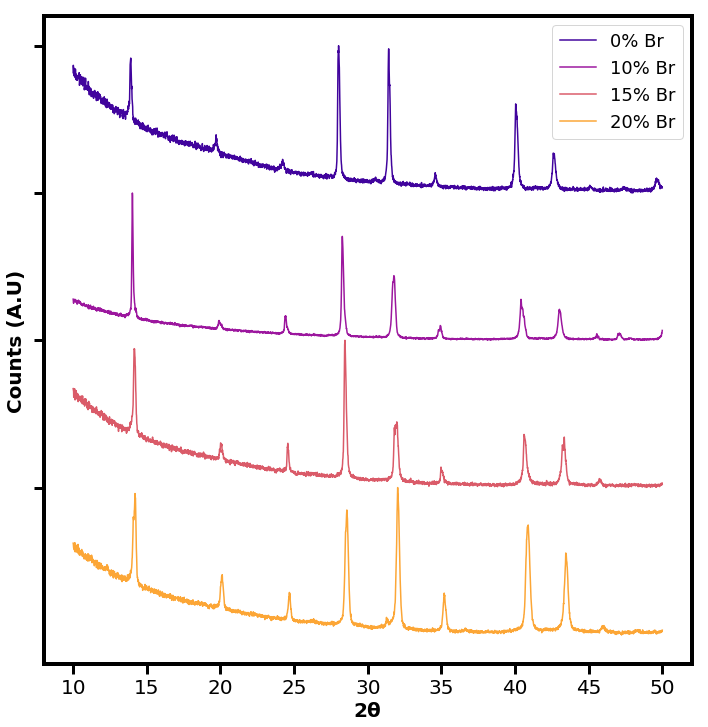

In [15]:
XRD_dir = '../Br-Study/SC XRD/'

SCXRD = pd.DataFrame(index = ['0%', '10%', '15%', '20%'], columns = ['theta','counts'])

SCXRD.loc['0%'] = aj.get_XRD(XRD_dir+ 'MAPbI3.ras')
SCXRD.loc['10%'] = aj.get_XRD(XRD_dir+ '10%Br.ras')
SCXRD.loc['15%'] = aj.get_XRD(XRD_dir+ '15%Br.ras')
SCXRD.loc['20%'] = aj.get_XRD(XRD_dir+ '20%Br.ras')

f5,ax5 = plt.subplots(nrows = 1, ncols = 1, figsize = [10,10])
f5.tight_layout()
f5.subplots_adjust(bottom = 0.05, top = 0.95, left = 0.05, right = 0.95)
i=0
for index, row in SCXRD.iterrows():
    ax5.plot(row['theta'][aj.find_nearest(10, row['theta']):aj.find_nearest(50, row['theta'])], 3 - i+aj.min_max(\
        row['counts'][aj.find_nearest(10, row['theta']):aj.find_nearest(50, row['theta'])]), label = index +' Br', color = colors[i])
    i+=1

aj.figure_quality_axes(ax5, r'2$\bf{\theta}$','Counts (A.U)', '',legend = True)
ax5.set_yticks([1,2,3,4])
ax5.set_yticklabels({})

f5.savefig('SCXRD.svg',format = 'svg', dpi = 1200)
    
plt.show()

['0%_836nm_504nmexc_800ns_15nmBW.txt', '10%_802nm_504nmexc_1600ns_15nmBW.txt', '15%_790nm_504nmexc_1600ns_15nmBW.txt', '20%_762nm_504nmexc_1600ns_15nmBW.txt']


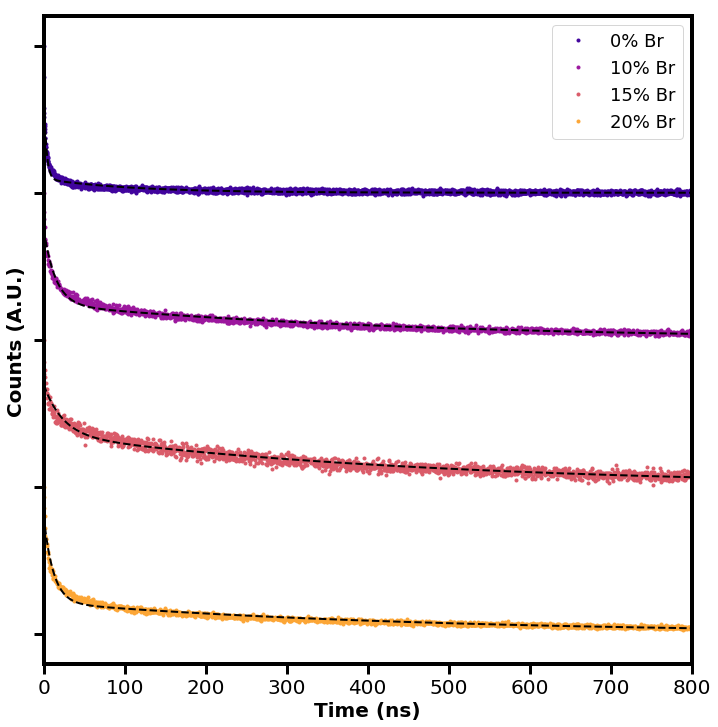

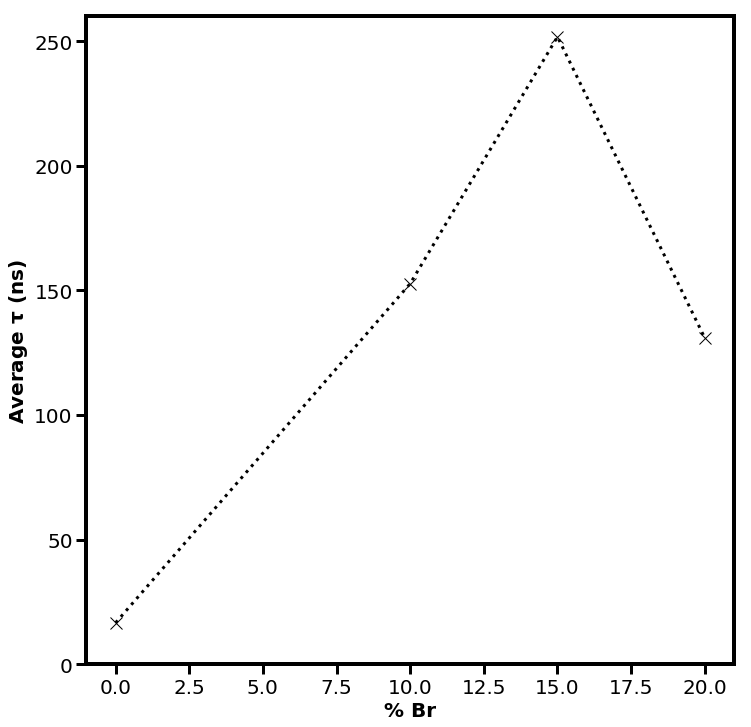

[[6.39063612e-01 5.10207275e-01 3.38260571e-01 5.84363112e-01]
 [3.06516209e+00 1.45751989e+01 2.32597860e+01 1.19091553e+01]
 [9.42528680e-02 2.40552859e-01 3.56035717e-01 2.12065553e-01]
 [1.08954400e+02 4.45838387e+02 4.68869080e+02 4.59027597e+02]]


In [16]:
SC_PL = '../Br-study/SC PL/'
files  = [f for f in os.listdir(SC_PL) if re.findall(r'.txt',f)]
print files

SC_PL_df = pd.DataFrame(index = files, columns = ['Time','Counts'])

fits = np.zeros([4,4])
var = np.zeros([4,4])
r2 = np.zeros([4,1])

f6, ax6 = plt.subplots(nrows = 1, ncols = 1, figsize = [10,10])
f6.tight_layout()
f6.subplots_adjust(bottom = 0.05, top = 0.95, left = 0.05, right = 0.95)

for to_add, Filename in enumerate(files):
    SC_PL_df.loc[to_add] = aj.get_lifetime(SC_PL+Filename, offset = 5)
    x = SC_PL_df.loc[to_add, 'Time']
    y = SC_PL_df.loc[to_add, 'Counts']
    #y = aj.min_max(y)
    popt, pvar = curve_fit(aj.fit_multi_exp(2),x, y, p0 = [1,10,1,100])
    
    y_pred = aj.fit_multi_exp(2)(x, *popt)
    r2[to_add] = r2_score(y,y_pred)
    ax6.plot(x,y+3 - to_add, '.', label = re.findall(r'\d+\s?%',Filename)[0] + ' Br',color = colors[to_add])
    ax6.plot(x, y_pred+3 - to_add,'--',linewidth = 2 ,color = 'k')
    fits[:,to_add] = popt
    var[:,to_add] = np.sqrt(np.diag(pvar))

#ax6.set_yscale('log')
#ax6.set_xscale('log')
aj.figure_quality_axes(ax6, 'Time (ns)', 'Counts (A.U.)', '',legend = True)
ax6.set_yticks([0,1,2,3,4])
ax6.set_yticklabels({})
ax6.set_xlim([0,800])

f6.savefig('Transient PL of SC.svg', format = 'svg', dpi = 1200)

np.savetxt('SC Fits.csv', np.concatenate((fits.T, var.T, r2), axis  = 1), delimiter  = ',')

av_lifetimes = (fits[0,:]*fits[1,:] + fits[2,:]*fits[3,:])/(fits[0,:] + fits[2,:])

f_temp, ax_temp = plt.subplots(nrows = 1, ncols = 1, figsize = [10,10])
f_temp.tight_layout()
f_temp.subplots_adjust(bottom = 0.05, top = 0.95, left = 0.05, right = 0.95)
ax_temp.plot([0,10,15,20], av_lifetimes, 'x:', color = 'k',markersize = 12, linewidth = 3)
aj.figure_quality_axes(ax_temp, '% Br',r'Average $\bf{\tau}$ (ns)','', legend = False)

ax_temp.set_ylim([0, 260])
f_temp.savefig('Lifetimes_RT.svg',format = 'svg', dpi = 600)
plt.show()
print fits


[1.         4.75511522 7.58843587 3.88532645]
[1.         4.0919723  4.30335149 4.21302487]


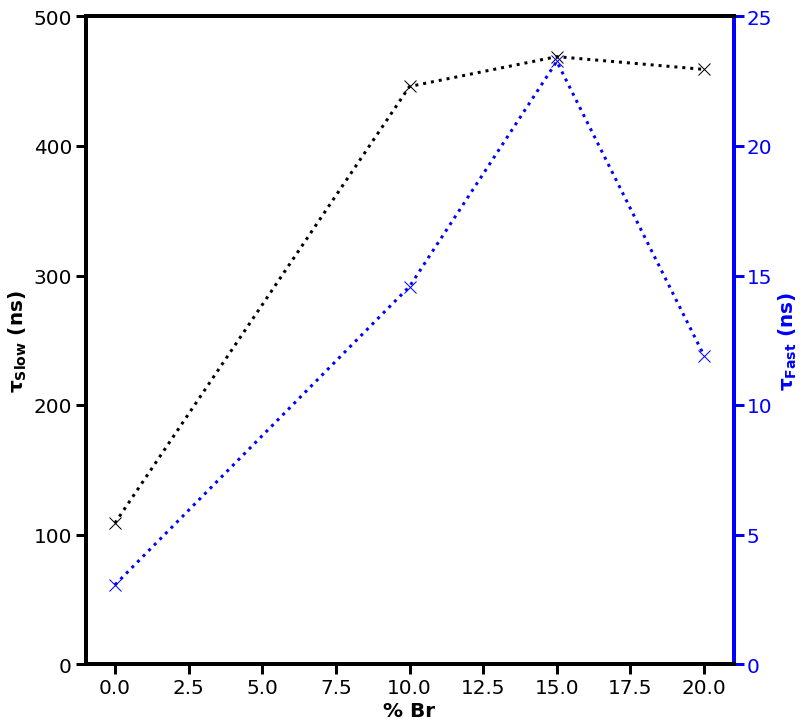

In [19]:
f_2, ax_2 = plt.subplots(nrows = 1, ncols = 1, figsize = [10,10])
f_2.tight_layout()
f_2.subplots_adjust(bottom = 0.05, top = 0.95, left = 0.05, right = 0.95)

ax_2t = ax_2.twinx()

ax_2.plot([0,10,15,20],np.max(fits[1:4:2,:], axis =0 ), 'x:', color = 'k',markersize = 12, linewidth = 3)
ax_2t.plot([0,10,15,20],np.min(fits[1:4:2,:], axis =0 ), 'x:', color = 'b',markersize = 12, linewidth = 3)
aj.figure_quality_axes(ax_2,'% Br', r'$\bf{\tau_{Slow}}$ (ns)','',legend = False)
aj.figure_quality_axes(ax_2t,'% Br', r'$\bf{\tau_{Fast}}$ (ns)','',legend = False)
ax_2t.set_ylim([0,25])
ax_2.set_ylim([0,500])
ax_2t.yaxis.label.set_color('b')
ax_2t.tick_params(axis = 'y', color = 'b')
[i.set_color("b") for i in ax_2t.get_yticklabels()]

ax_2t.spines['right'].set_color('b')
ax_2t.spines['right'].set_color('b')

print np.min(fits[1:4:2,:], axis = 0)/np.min(fits[1:4:2,0], axis = 0)
print np.max(fits[1:4:2,:], axis = 0)/np.max(fits[1:4:2,0], axis = 0)

f_2.savefig('Both Lifetimes_RT.svg',format = 'svg',dpi = 1200)

plt.show()


../../../DataAnalysis.py:67: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
  sheet = book.get_sheet_by_name(sheet)


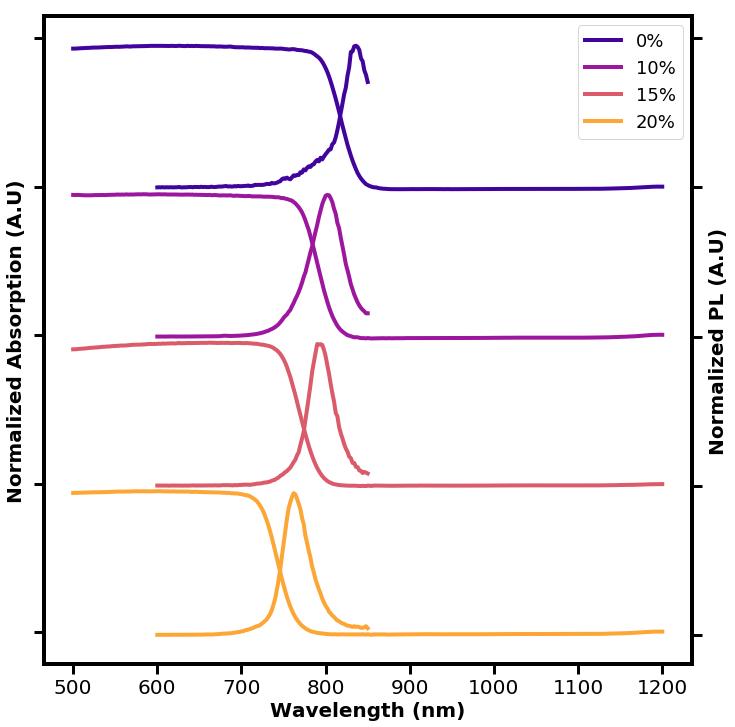

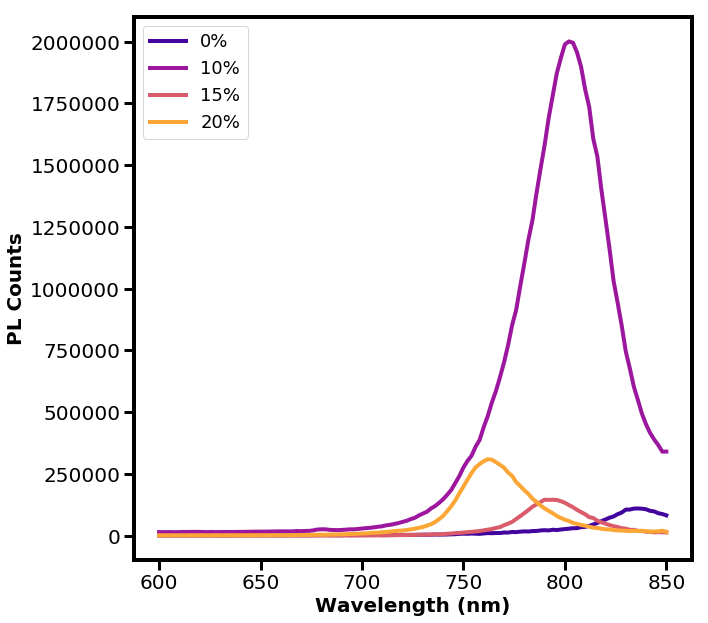

In [20]:
SC_Abs_dir = '../Br-Study/SC Abs/Scan - Lambda 950 Wednesday, July 24, 2019 1_49 PM Eastern Daylight Time/'
PL_dir = '../Br-Study/SC PL/'


files = [x for x in os.listdir(SC_Abs_dir) if re.findall(r'Raw.csv',x)]
SC_abs_df = pd.DataFrame(index = files[0:-1], columns = ['Wavelength','OD'])
list_sheets = ['0%', '10%','15%','20%']
SC_PL_df = pd.DataFrame(index = list_sheets, columns = ['Wavelength','Counts'])

bw, bA = aj.get_absorption(SC_Abs_dir+ files[-1])

f7, ax7 = plt.subplots(nrows = 1, ncols = 1, figsize = [10,10])
f7.tight_layout()
f7.subplots_adjust(bottom = 0.05, top = 0.95, left = 0.05, right = 0.95)
ax7t = ax7.twinx()
f8, ax8 = plt.subplots(nrows = 1, ncols = 1, figsize = [10,10])

for i, fil in enumerate(files[0:-1]):
    SC_abs_df.loc[fil] = aj.get_absorption(SC_Abs_dir+fil)
    SC_PL_df.loc[list_sheets[i]] = aj.get_lamp_PL(PL_dir + 'varied Br in SC.xlsx', list_sheets[i])
    
    x = SC_abs_df.loc[fil, 'Wavelength'] 
    y = SC_abs_df.loc[fil, 'OD'] - bA
    y = y/np.max(y)*0.95
    
    x_pl = SC_PL_df.loc[list_sheets[i]]['Wavelength']
    y_pl = SC_PL_df.loc[list_sheets[i]]['Counts']
    ax8.plot(x_pl,3+y_pl - i, label = re.findall(r'\d+\s?%', fil)[0], color = colors[i], linewidth = 4)
    
    
    y_pl = aj.min_max(y_pl)*0.95
    
    ax7.plot(x,3+y-i, label = re.findall(r'\d+\s?%', fil)[0], color = colors[i], linewidth = 4)
    ax7t.plot(x_pl,3+y_pl - i, label = re.findall(r'\d+\s?%', fil)[0], color = colors[i], linewidth = 4)
    
aj.figure_quality_axes(ax7, 'Wavelength (nm)', 'Normalized Absorption (A.U)', '',legend = True)
aj.figure_quality_axes(ax7t, 'Wavelength (nm)', 'Normalized PL (A.U)', '',legend = False)
aj.figure_quality_axes(ax8, 'Wavelength (nm)', 'PL Counts','', legend = True)
ax7.set_yticks([0,1,2,3,4])
ax7t.set_yticks([0,1,2,3,4])
ax7.set_yticklabels({})
ax7t.set_yticklabels({})

f7.savefig('Absorption_PL SC.svg', format = 'svg', dpi = 1200)
plt.show()

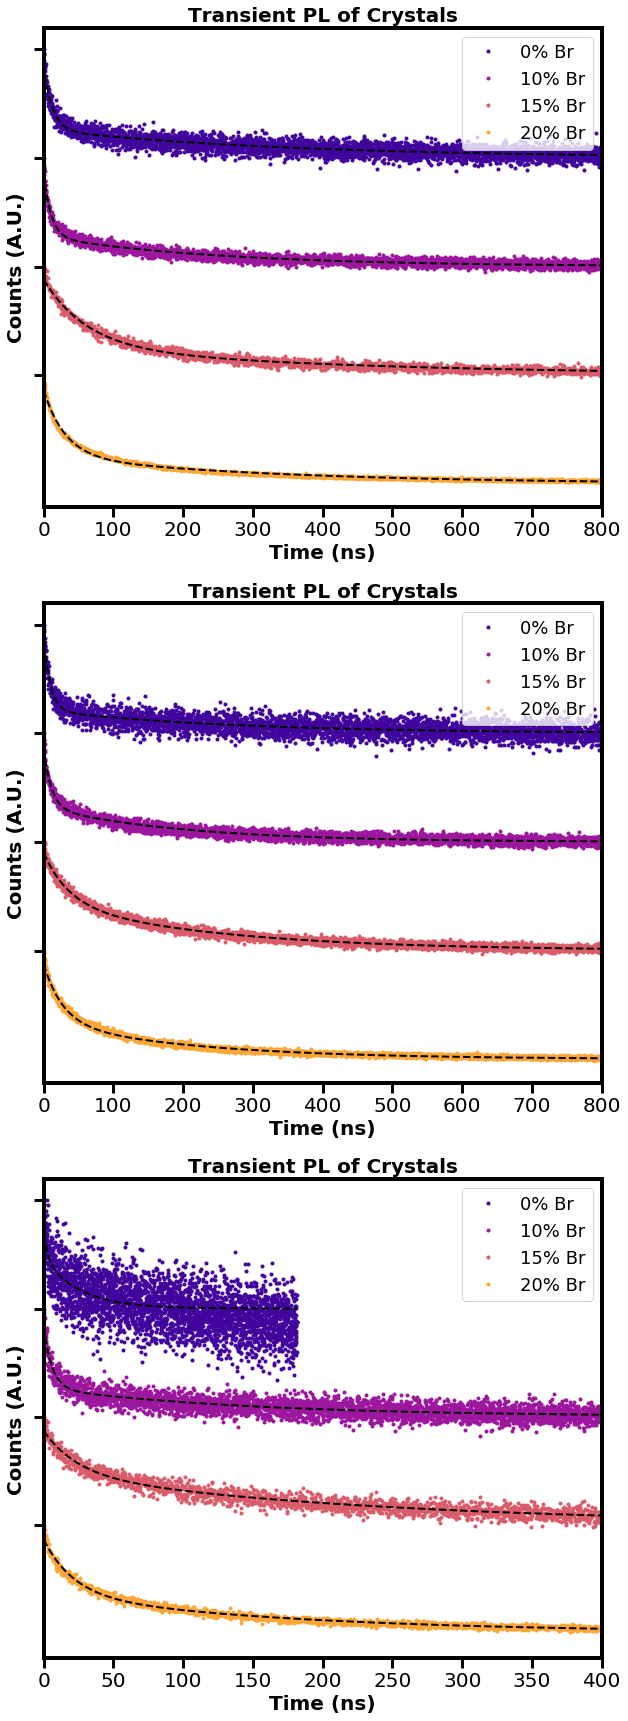

In [21]:
low_T_PL_dir = '../Br-Study/SC Low T PL/'

spectra = [x for x in os.listdir(low_T_PL_dir) if not re.findall(r'nm.txt',x)]
lifetimes = [x for x in os.listdir(low_T_PL_dir) if re.findall(r'nm.txt',x)]

SC_LowT_PL_lifetime_df = pd.DataFrame(index = lifetimes, columns = ['Time','Counts'])
lifetimes.sort(key = lambda x: int(re.findall(r'(\d+)K',x)[0]))


fits = np.zeros([4,12])
var = np.zeros([4,12])
r2 = np.zeros([12])

f7, ax7 = plt.subplots(nrows = 3, ncols = 1, figsize = [10,30])

for to_add, Filename in enumerate(lifetimes):
    SC_LowT_PL_lifetime_df.loc[Filename] = aj.get_lifetime(low_T_PL_dir+Filename, offset = 10)
    x = SC_LowT_PL_lifetime_df.loc[Filename, 'Time']
    y = SC_LowT_PL_lifetime_df.loc[Filename, 'Counts']
    #y = aj.min_max(y)
   
    popt, pvar = curve_fit(aj.fit_multi_exp(2),x, y, p0 = [1,10,1,100])
    y_pred = aj.fit_multi_exp(2)(x, *popt)
    y += 2 - to_add%4
    y_pred += 2 - to_add%4
        
    r2[to_add] = r2_score(y,y_pred)
    ax7[to_add/4].plot(x,y, '.', label = re.findall(r'(\d+)[Bb]r',Filename)[0] + '% Br' ,color = colors[to_add%4])
    ax7[to_add/4].plot(x, y_pred,'--',linewidth = 2 ,color = 'k')
    fits[:,to_add] = popt
    var[:,to_add] = np.sqrt(np.diag(pvar))
  

    
for axis in ax7:
    aj.figure_quality_axes(axis, 'Time (ns)', 'Counts (A.U.)', 'Transient PL of Crystals',legend = True)
    axis.set_yticks([0,1,2,3])
    axis.set_yticklabels({})
    axis.set_xlim([0,800])

    
ax7[2].set_xlim([0,400])
f7.savefig('Low T PL of SC.svg', format = 'svg', dpi = 600)

np.savetxt('Low T SC Fits.csv', np.concatenate((fits.T, var.T, r2.reshape(12,1)), axis  = 1), delimiter  = ',')
 





plt.show()


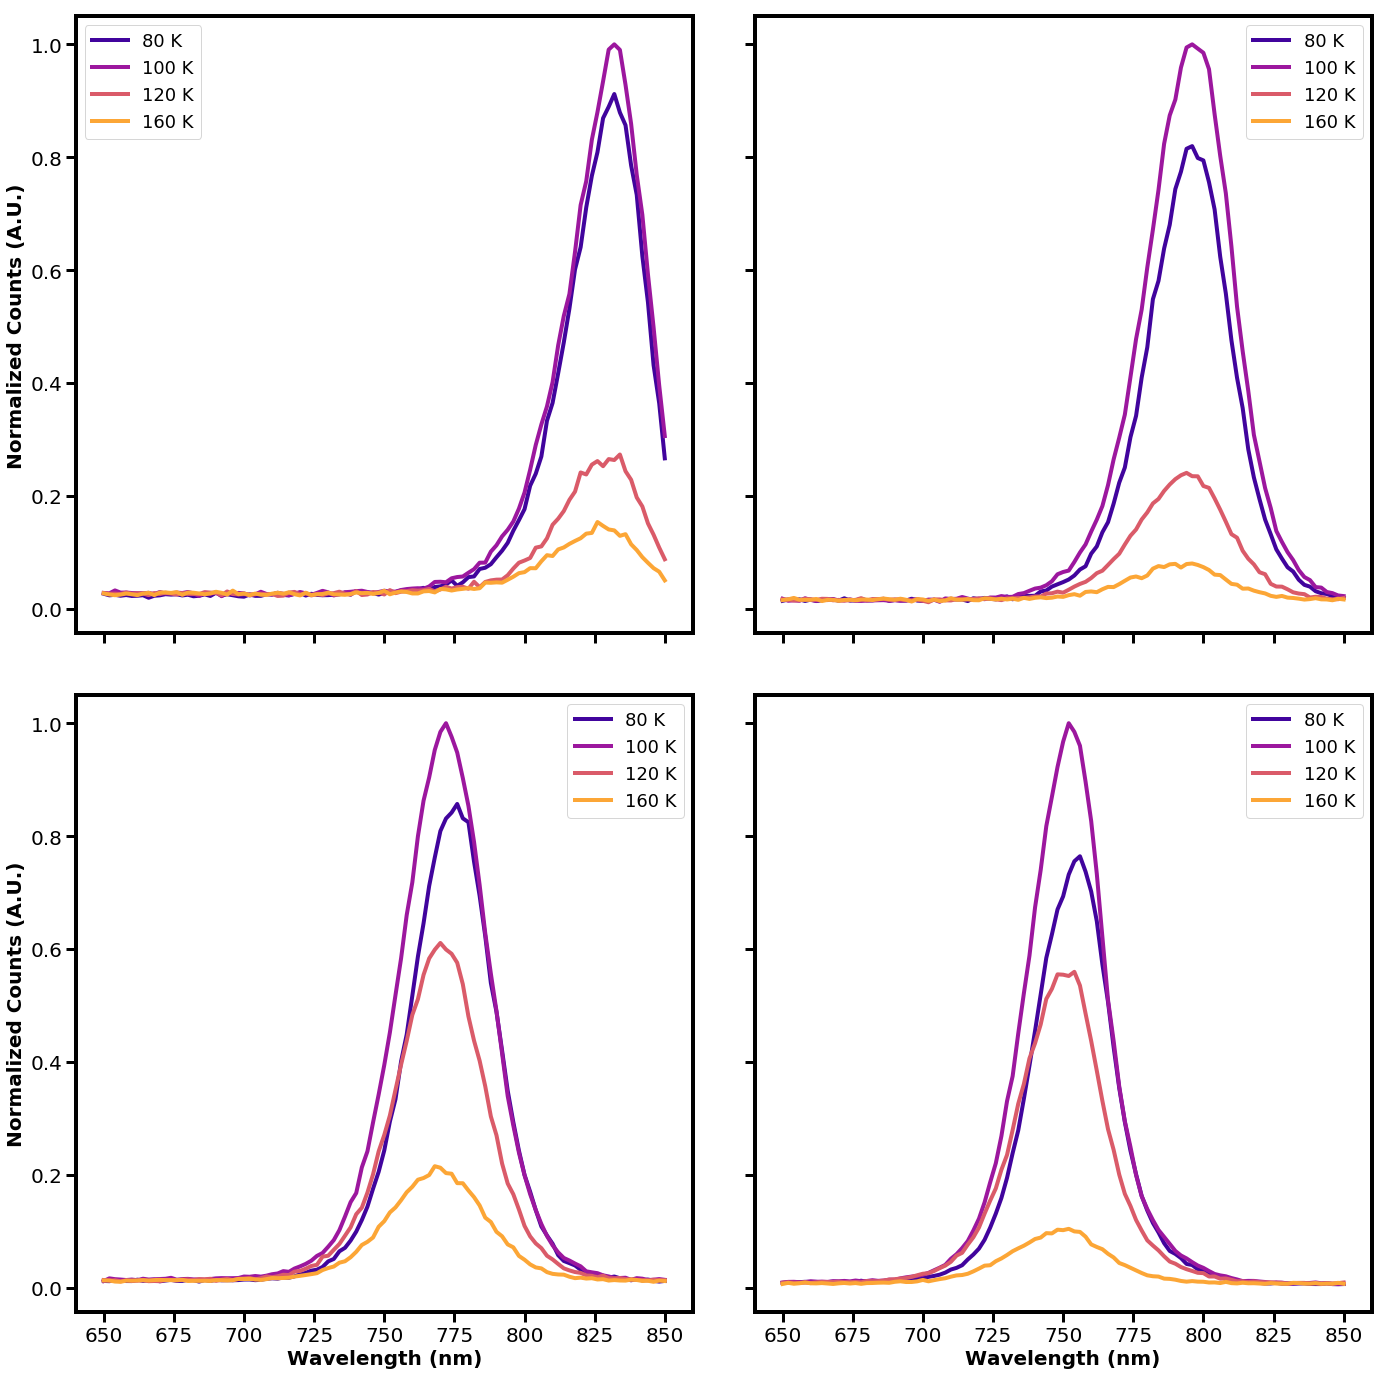

In [33]:
SC_LowT_PL_df = pd.DataFrame(index = spectra, columns = ['Wavelength','Counts'])

f8, ax8 = plt.subplots(nrows = 2, ncols = 2, figsize = [20,20], sharex = True, sharey = True)
f8.tight_layout()
f8.subplots_adjust(wspace = 0.1, hspace = 0.1, top = 0.95, bottom = 0.05, left = 0.05, right = 0.95)

spectra.sort(key = lambda x: int(re.findall(r'(\d+)K',x)[0]))

maximums = np.zeros(4)
max_int = np.zeros([4,4])
for to_add, Filename in enumerate(spectra):
    SC_LowT_PL_df.loc[Filename] = aj.PLFromLaser(low_T_PL_dir+Filename)
    x = SC_LowT_PL_df.loc[Filename, 'Wavelength']
    y = SC_LowT_PL_df.loc[Filename, 'Counts']
    
    if np.max(y) > maximums[to_add%4]:
        maximums[to_add%4] = np.max(y)
          
for to_add, Filename in enumerate(spectra):
    SC_LowT_PL_df.loc[Filename] = aj.PLFromLaser(low_T_PL_dir+Filename)
    x = SC_LowT_PL_df.loc[Filename, 'Wavelength']
    y = SC_LowT_PL_df.loc[Filename, 'Counts']           
    
    
    y = y/maximums[to_add%4]
    
    
    max_int[to_add%4, to_add/4] = np.trapz(y,x)
    
    
    ax8[to_add/2%2, to_add%2].plot(x,y,label = re.findall(r'(\d+)K',Filename)[0] + ' K', linewidth = 4, color = colors[to_add/4])
    aj.figure_quality_axes(ax8[to_add/2%2, to_add%2], 'Wavelength (nm)','Normalized Counts (A.U.)','', legend = True)
    

ax8[0,0].set_yticks([0,0.2,0.4,0.6,0.8,1]) 
ax8[0,1].set_yticks([0,0.2,0.4,0.6,0.8,1])
ax8[1,0].set_yticks([0,0.2,0.4,0.6,0.8,1])
ax8[1,1].set_yticks([0,0.2,0.4,0.6,0.8,1])



ax8[0,1].set_ylabel('')
ax8[1,1].set_ylabel('')
ax8[0,0].set_xlabel('')
ax8[0,1].set_xlabel('')
f8.savefig('Low-T PL spectra.svg',format = 'svg', dpi = 1200)
plt.show()


[[34.5974435  38.21267136 14.21026306  9.96128196]
 [33.14918695 42.2866965  12.37302194  5.89937793]
 [34.55236157 41.84389044 26.44229628 11.08513525]
 [28.46256934 36.76574542 23.05606009  5.56290806]]


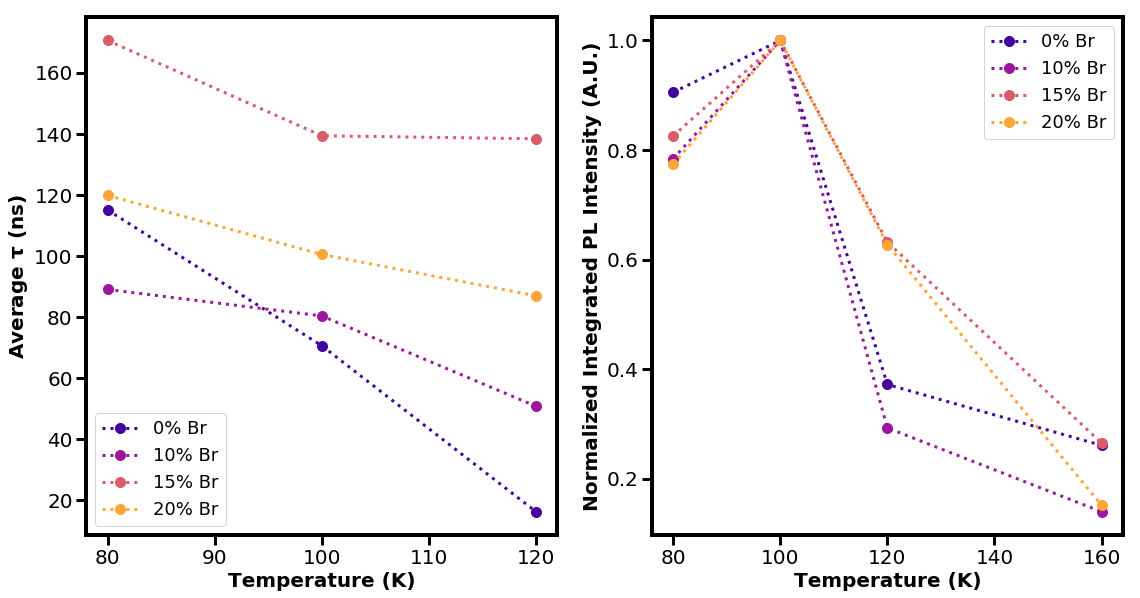

In [31]:
f9, ax9 = plt.subplots(nrows = 1, ncols = 2, figsize = [16,8])
f9.tight_layout()
f9.subplots_adjust(wspace = 0.2, hspace = 0.1, top = 0.95, bottom = 0.05, left = 0.05, right = 0.95)
av_lifetimes = (fits[0,:]*fits[1,:] + fits[2,:]*fits[3,:])/(fits[0,:] + fits[2,:])
print max_int
T = [80, 100, 120, 160]


ax9[0].plot(T[:-1], av_lifetimes[0::4], 'o:',label = '0% Br', color = colors[0], markersize = 10, linewidth = 3)
ax9[0].plot(T[:-1], av_lifetimes[1::4], 'o:',label = '10% Br', color = colors[1], markersize = 10, linewidth = 3)
ax9[0].plot(T[:-1], av_lifetimes[2::4], 'o:',label = '15% Br', color = colors[2], markersize = 10, linewidth = 3)
ax9[0].plot(T[:-1], av_lifetimes[3::4], 'o:',label = '20% Br', color = colors[3], markersize = 10, linewidth = 3)

ax9[1].plot(T, max_int[0]/np.max(max_int[0]),'o:',label = '0% Br', color = colors[0], markersize = 10, linewidth = 3)
ax9[1].plot(T, max_int[1]/np.max(max_int[1]),'o:',label = '10% Br', color = colors[1], markersize = 10, linewidth = 3)
ax9[1].plot(T, max_int[2]/np.max(max_int[2]),'o:',label = '15% Br', color = colors[2], markersize = 10, linewidth = 3)
ax9[1].plot(T, max_int[3]/np.max(max_int[3]),'o:',label = '20% Br', color = colors[3], markersize = 10, linewidth = 3)

aj.figure_quality_axes(ax9[0], 'Temperature (K)',r'Average $\bf{\tau}$ (ns)', '',legend = True)
aj.figure_quality_axes(ax9[1], 'Temperature (K)',r'Normalized Integrated PL Intensity (A.U.)', '',legend = True)

f9.savefig('LowT SC Lifetimes and Intensities.svg',format = 'svg', dpi = 1200)
np.savetxt('LowT_intensities.csv',max_int, delimiter = ',')
plt.show()

In [25]:
av_lifetimes

array([115.03541325,  89.04325139, 170.53321148, 119.82330516,
        70.61652871,  80.38313032, 139.35059864, 100.49624921,
        16.30017717,  50.82564869, 138.35879452,  86.96082785])

In [26]:
fits[1,:]

array([12.13211495, 10.74886779, 61.57164359, 31.13171483,  9.27237209,
       10.94943351, 35.62399736, 27.39240738,  2.27493161,  5.99343211,
       24.01332883, 21.3526511 ])

In [28]:
fits

array([[5.98484206e-01, 5.79063593e-01, 6.14493310e-01, 6.04491000e-01,
        7.00068152e-01, 5.44981934e-01, 4.52112042e-01, 5.31043157e-01,
        3.16867681e-01, 5.72881000e-01, 3.90289269e-01, 5.01700003e-01],
       [1.21321150e+01, 1.07488678e+01, 6.15716436e+01, 3.11317148e+01,
        9.27237209e+00, 1.09494335e+01, 3.56239974e+01, 2.73924074e+01,
        2.27493161e+00, 5.99343211e+00, 2.40133288e+01, 2.13526511e+01],
       [2.59774968e-01, 2.75635819e-01, 2.66723056e-01, 2.56470864e-01,
        2.11356747e-01, 3.18422709e-01, 4.47712638e-01, 3.42727635e-01,
        4.71368648e-01, 2.63112703e-01, 4.76963132e-01, 3.60249236e-01],
       [3.52109829e+02, 2.53526326e+02, 4.21565708e+02, 3.28865639e+02,
        2.73804224e+02, 1.99219222e+02, 2.44096459e+02, 2.13767812e+02,
        2.57283542e+01, 1.48439807e+02, 2.31925373e+02, 1.78329856e+02]])